In [ ]:
##############################################################################
###                       Pronosticos y series de tiempo                    ##
###                      UANL FIME Logistica                                ##
###                     25/06/2022                                          ##
###                                                   xoce15@ingenieros.com ##
##############################################################################

#Librerias

In [1]:
import pandas as pd
from matplotlib import pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.holtwinters import SimpleExpSmoothing
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from google.colab import drive
from google.colab import files
import numpy as np
from datetime import date
import warnings
warnings.filterwarnings("ignore")

ImportError: Unable to import required dependencies:
numpy: No module named 'numpy'

In [ ]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.metrics import max_error

# Funciones

### Calculo de error

In [ ]:
def calcsmape(actual, forecast):
    return 1/len(actual) * np.sum(2 * np.abs(forecast-actual) / (np.abs(actual) + np.abs(forecast)))

In [ ]:
def errores( reales, prediccion):
  s=[]
  s.append(['r2_score' ,r2_score(reales, prediccion)])
  s.append(['mean_absolute_error' ,mean_absolute_error(reales, prediccion)])
  s.append(['mean_squared_error' ,mean_squared_error(reales, prediccion)])
  s.append(['mean_absolute_percentage_error' ,mean_absolute_percentage_error(reales, prediccion)])
  s.append(['max_error' ,max_error(reales, prediccion)])
  s=pd.DataFrame(s)
  s.columns=['metrica', 'valor']
  return s

#Conexion Drive

In [ ]:
#from google.colab import files
#uploaded = files.upload()

In [ ]:
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


# Path de conexiones, accesos a datos

In [ ]:
path='/content/drive/MyDrive/Planeacion_Demanda_Pronosticos/Datos_Clase'

path_imagenes='/content/drive/MyDrive/forecastFIME_images'

# Variables

In [ ]:
today = date.today()
print(today)
today= today.strftime("%d-%b-%Y")

2025-02-05


# Lectura de datos

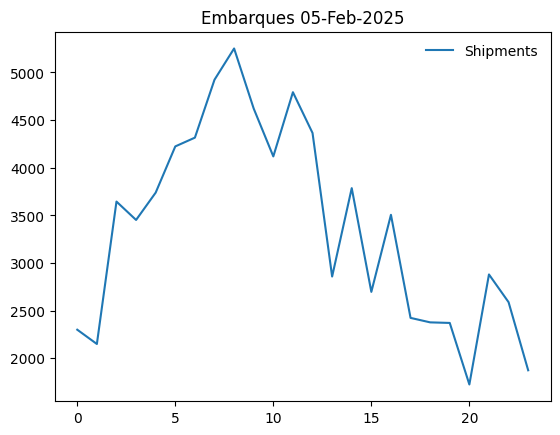

In [ ]:
airline = pd.read_csv(path+"/" +'Shipment.csv', parse_dates=True)
airline['Month']=pd.to_datetime(airline['Month'], errors='coerce') #.dt.strftime('%Y-%m')

airline.dropna(axis=0, inplace=True)
airline[['Shipments']].plot(title='Embarques '+today)
plt.legend(framealpha=1, frameon=False);

# Descomposición de la Serie de tiempo

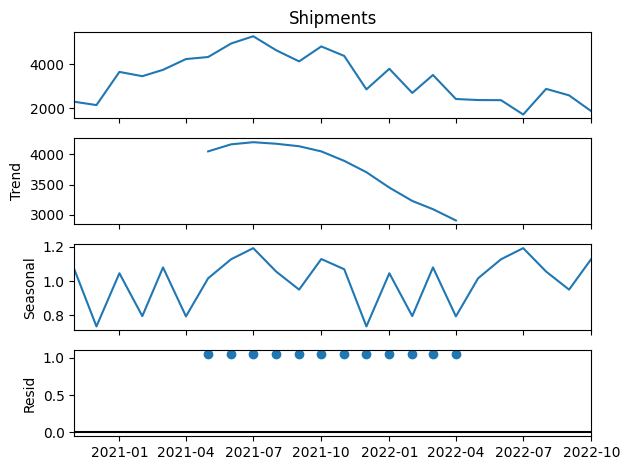

In [ ]:
airline = airline.set_index('Month')
airline.index.freq = "MS"

decompose_result = seasonal_decompose(airline["Shipments"],model="multiplicative")
decompose_result.plot();

# Verificación de alphas

alpha: 0.014
alpha: 0.039
alpha: 0.043
alpha: 0.069
alpha: 0.073
alpha: 0.112
alpha: 0.117
alpha: 0.13
alpha: 0.131
alpha: 0.135
alpha: 0.137
alpha: 0.142
alpha: 0.147
alpha: 0.147
alpha: 0.16
alpha: 0.164
alpha: 0.177
alpha: 0.186
alpha: 0.194
alpha: 0.203
alpha: 0.203
alpha: 0.212
alpha: 0.214
alpha: 0.225
alpha: 0.226
alpha: 0.231
alpha: 0.235
alpha: 0.236
alpha: 0.253
alpha: 0.257
alpha: 0.259
alpha: 0.276
alpha: 0.295
alpha: 0.295
alpha: 0.314
alpha: 0.341
alpha: 0.359
alpha: 0.364
alpha: 0.366
alpha: 0.375
alpha: 0.39
alpha: 0.396
alpha: 0.413
alpha: 0.43
alpha: 0.43
alpha: 0.432
alpha: 0.44
alpha: 0.443
alpha: 0.459
alpha: 0.487
alpha: 0.491
alpha: 0.523
alpha: 0.531
alpha: 0.543
alpha: 0.554
alpha: 0.556
alpha: 0.564
alpha: 0.581
alpha: 0.591
alpha: 0.604
alpha: 0.605
alpha: 0.608
alpha: 0.617
alpha: 0.639
alpha: 0.644
alpha: 0.651
alpha: 0.677
alpha: 0.684
alpha: 0.684
alpha: 0.685
alpha: 0.691
alpha: 0.717
alpha: 0.719
alpha: 0.723
alpha: 0.728
alpha: 0.734
alpha: 0.745
alpha

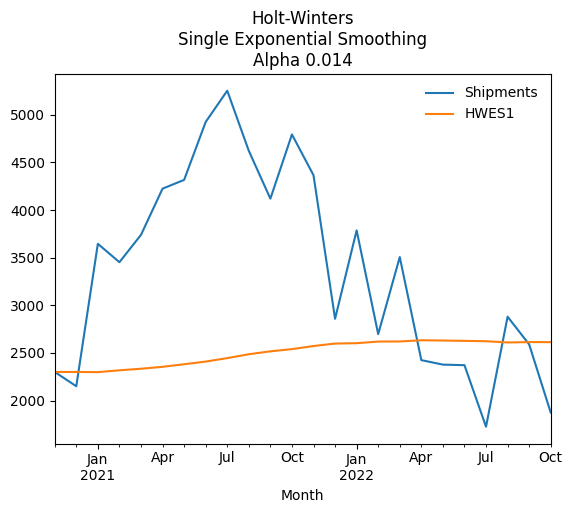

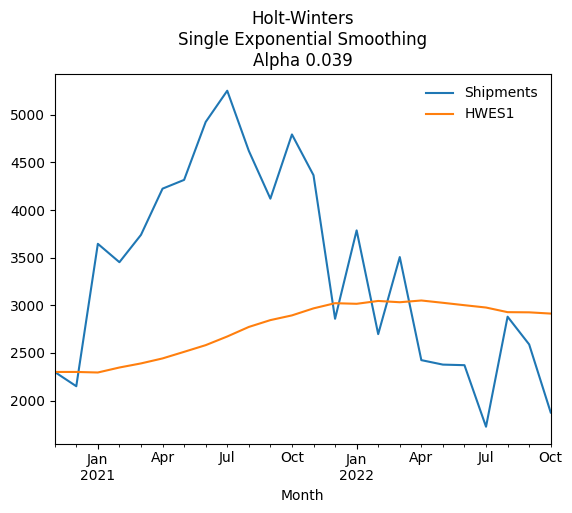

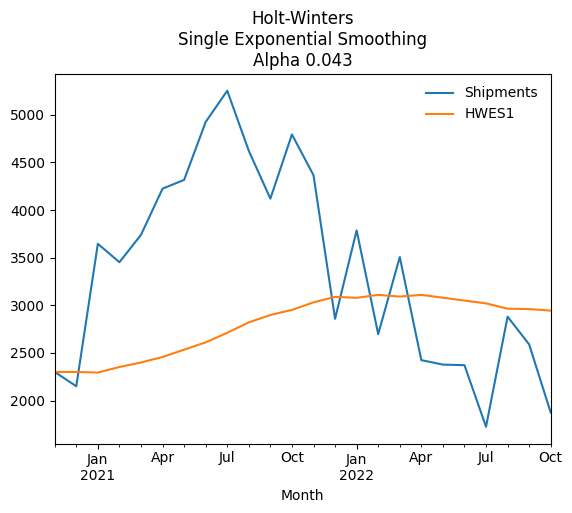

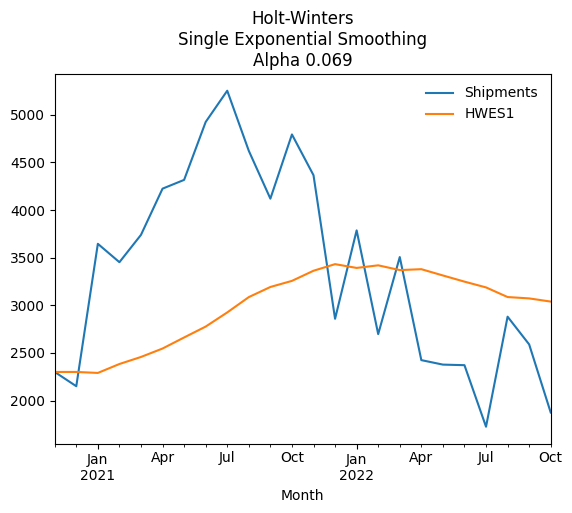

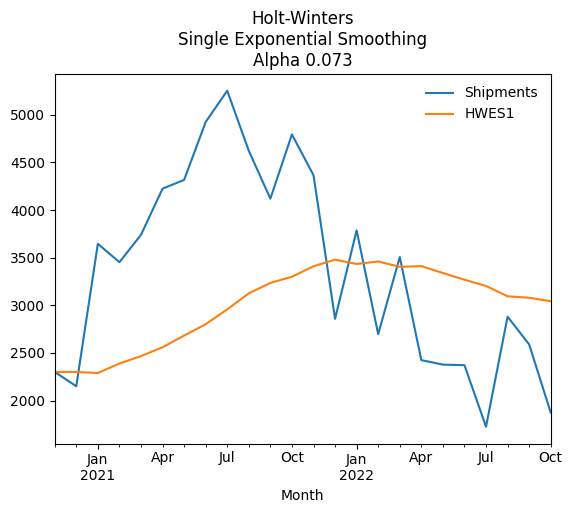

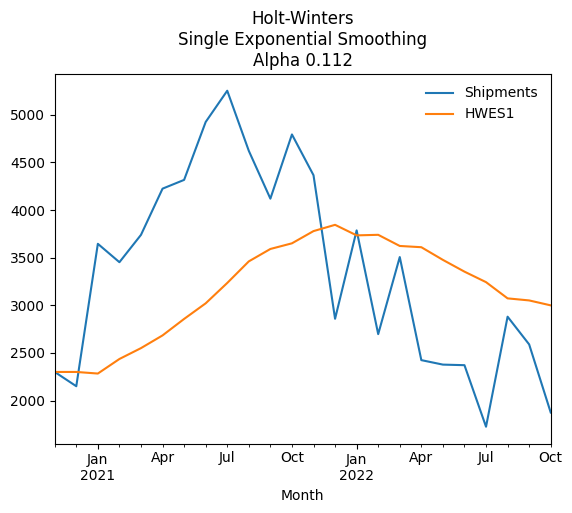

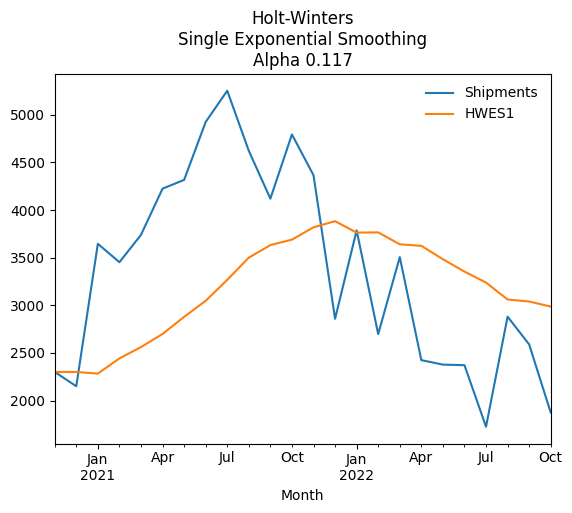

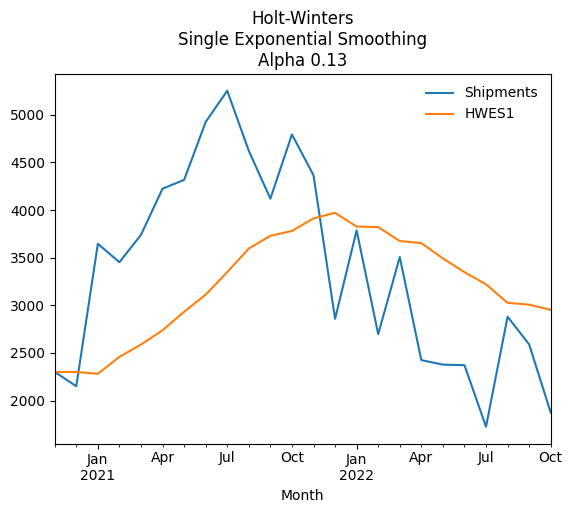

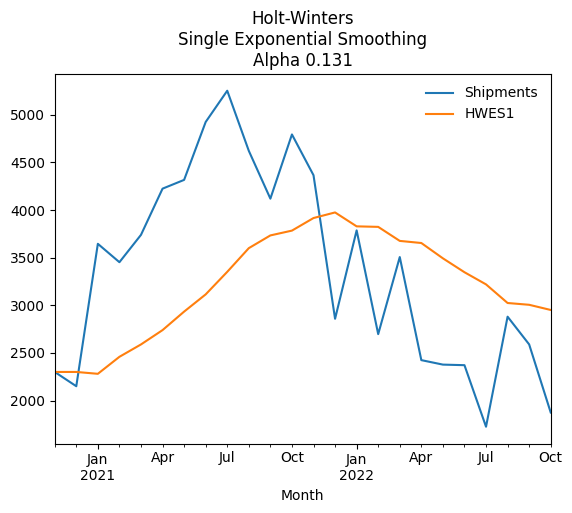

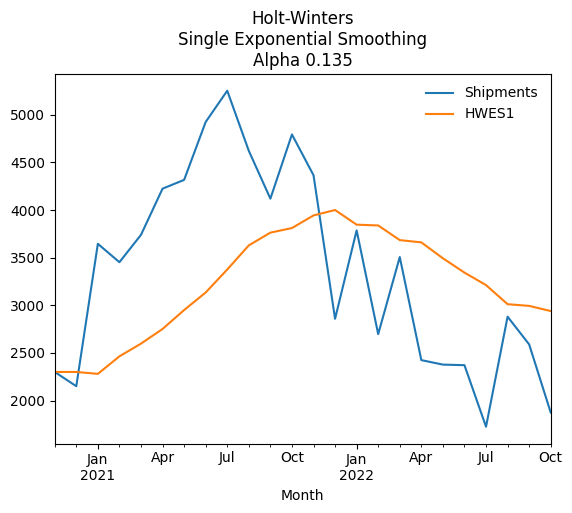

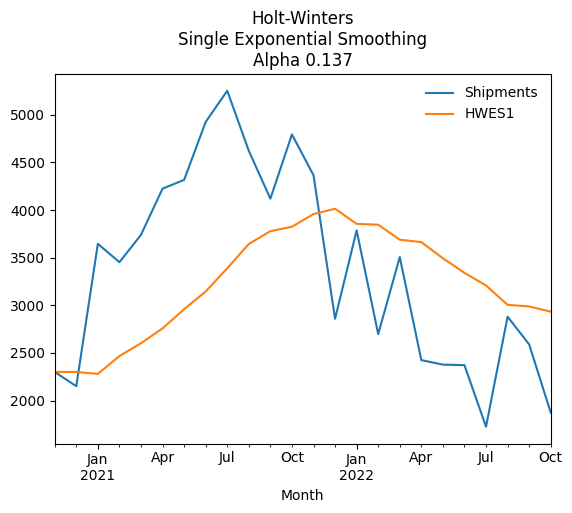

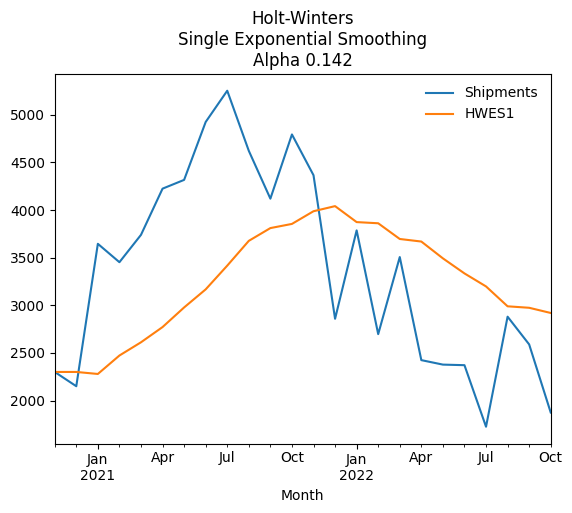

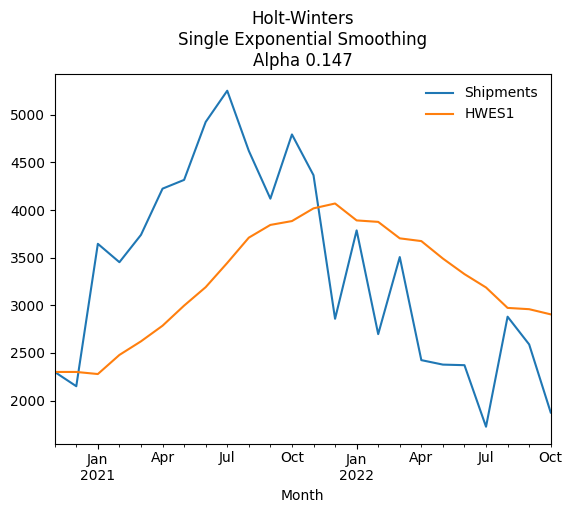

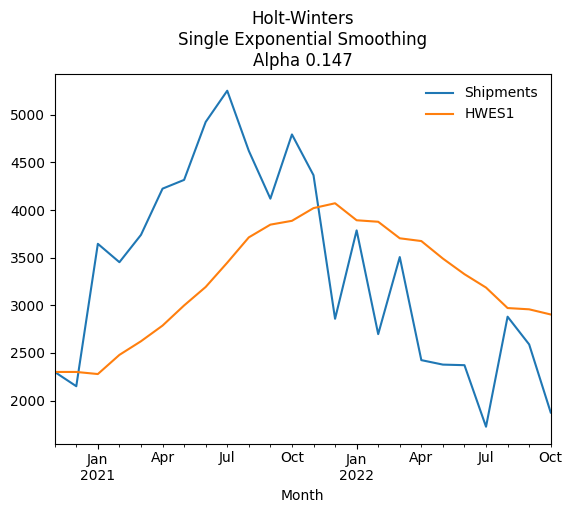

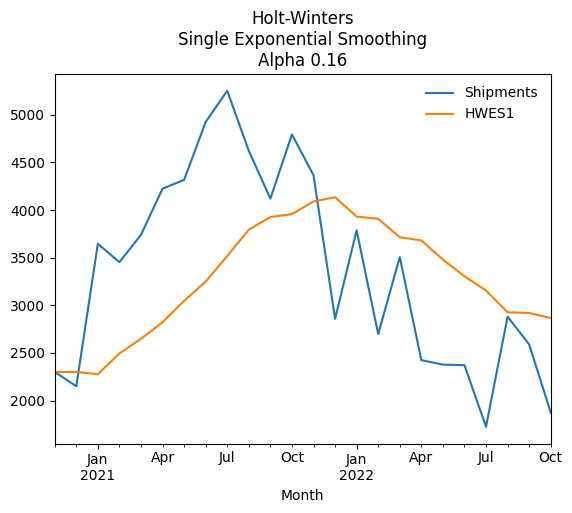

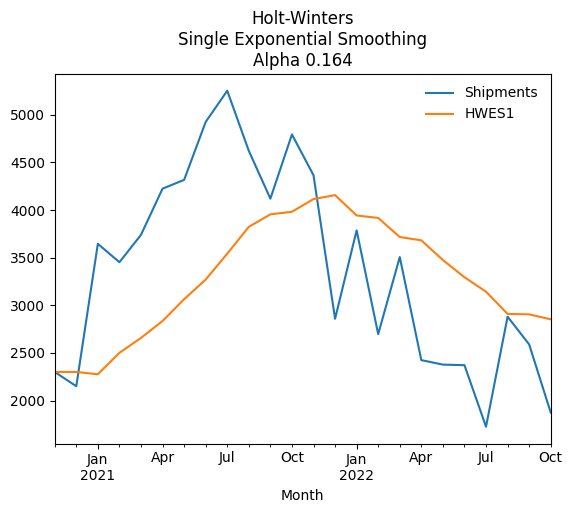

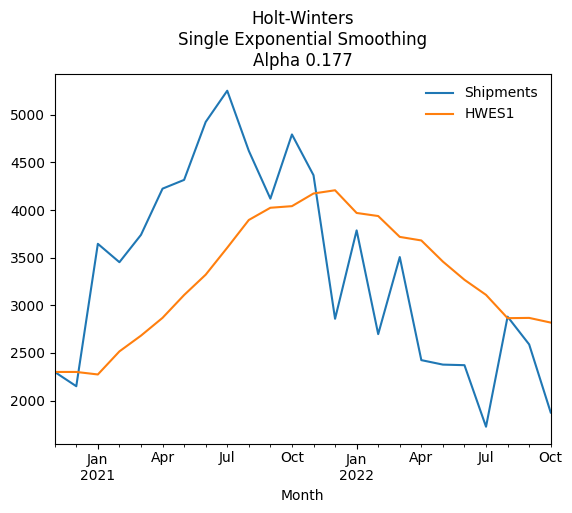

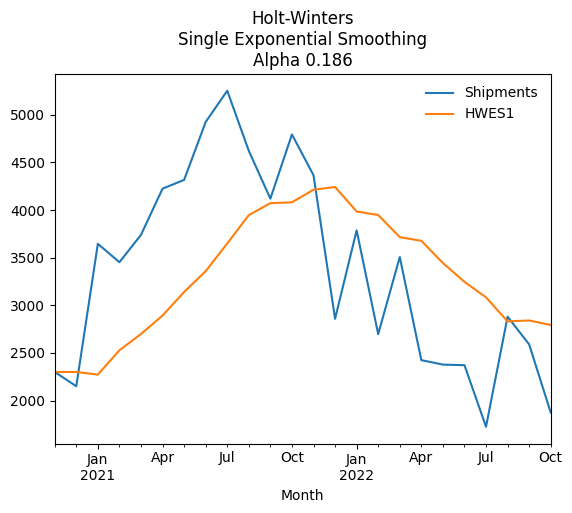

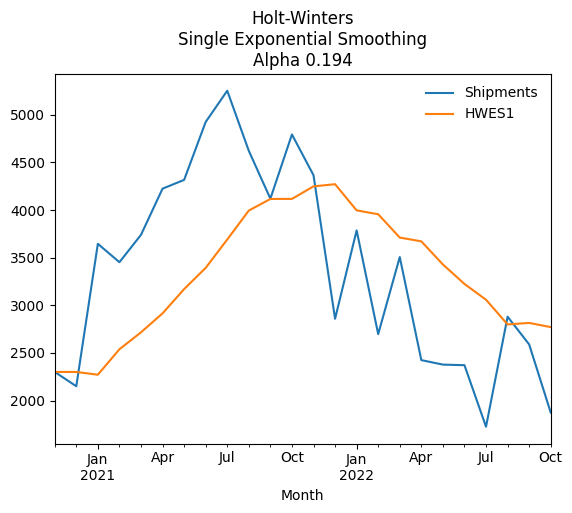

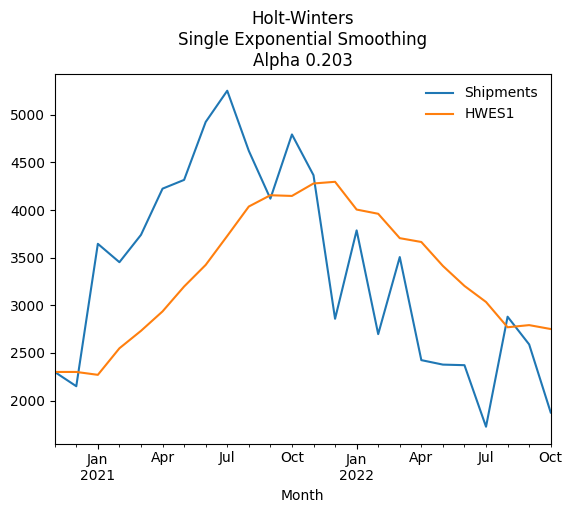

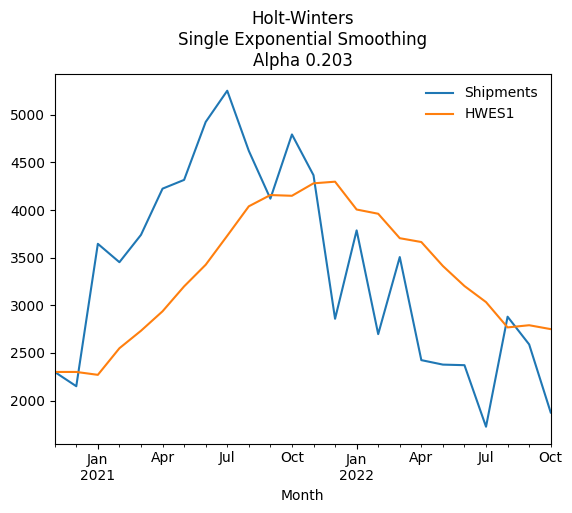

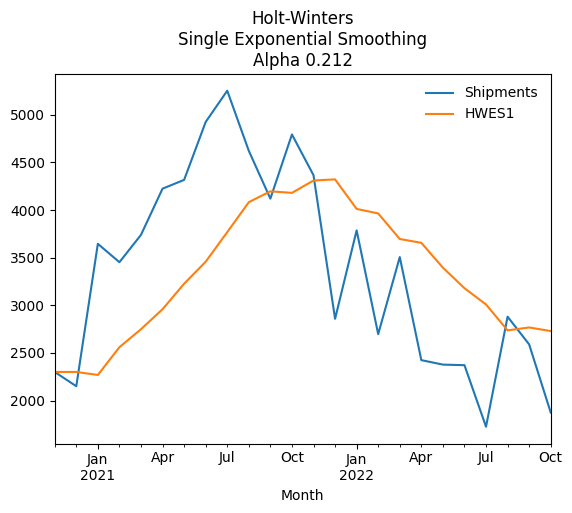

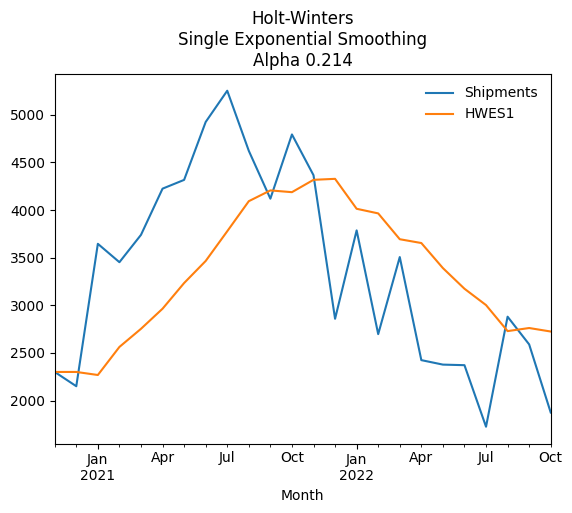

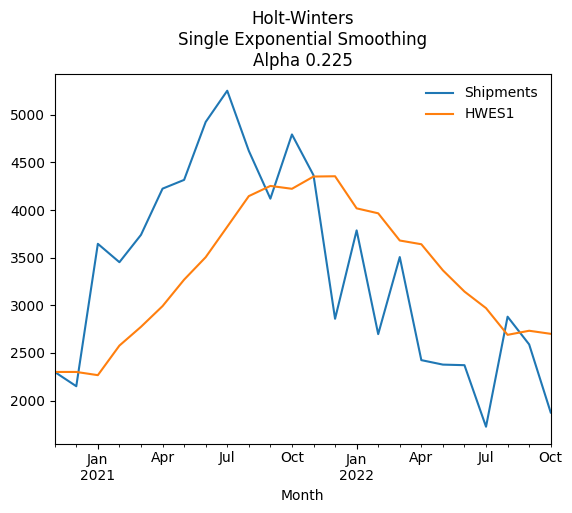

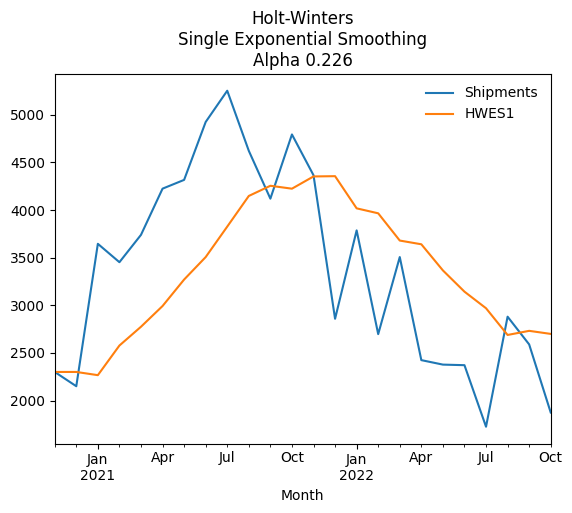

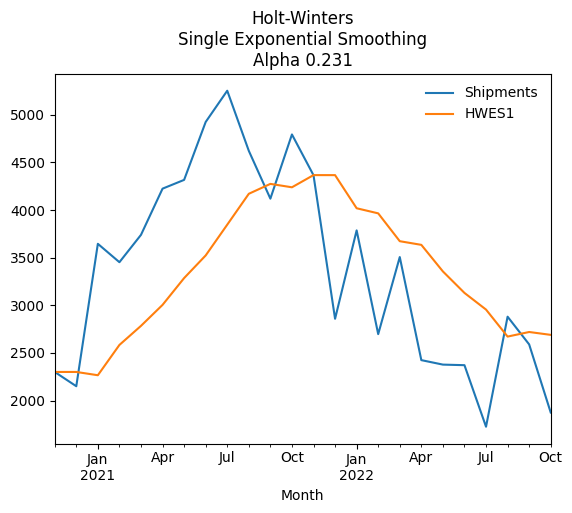

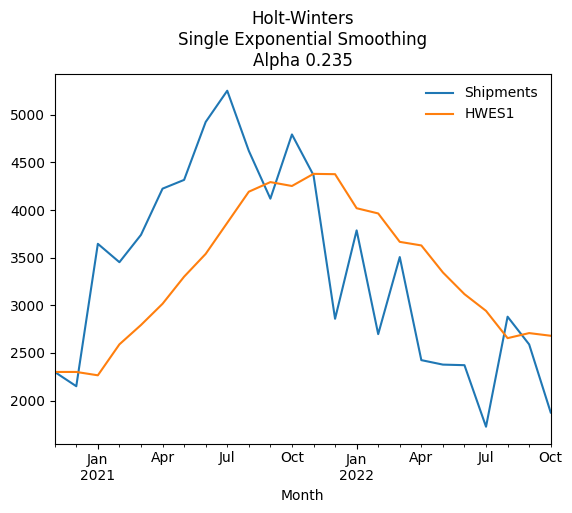

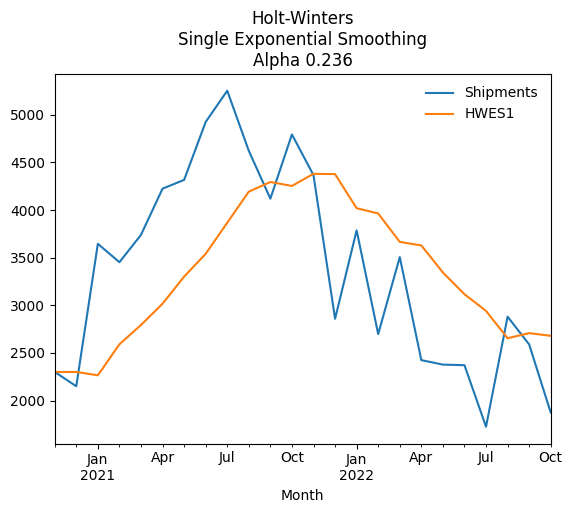

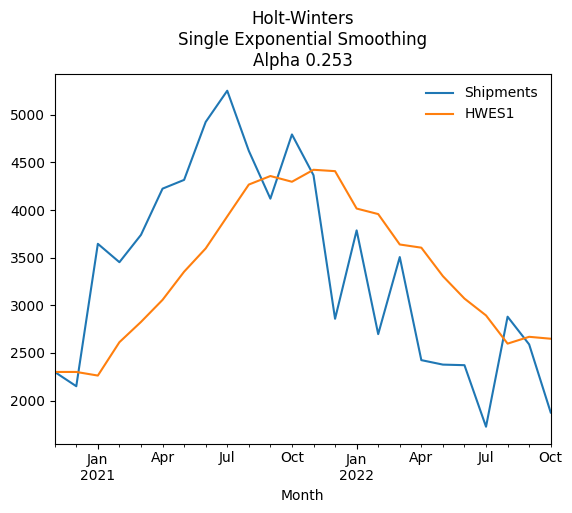

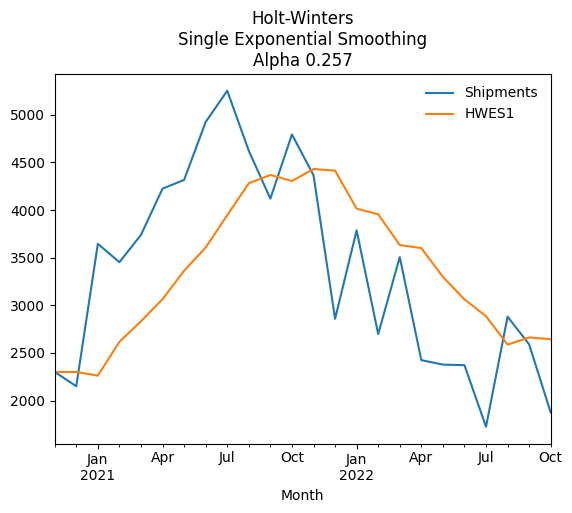

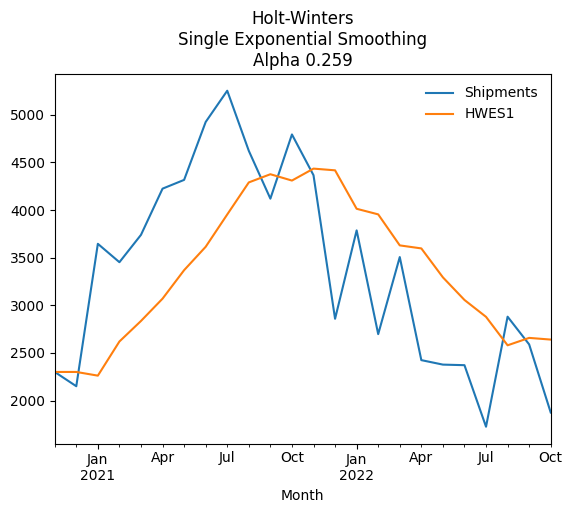

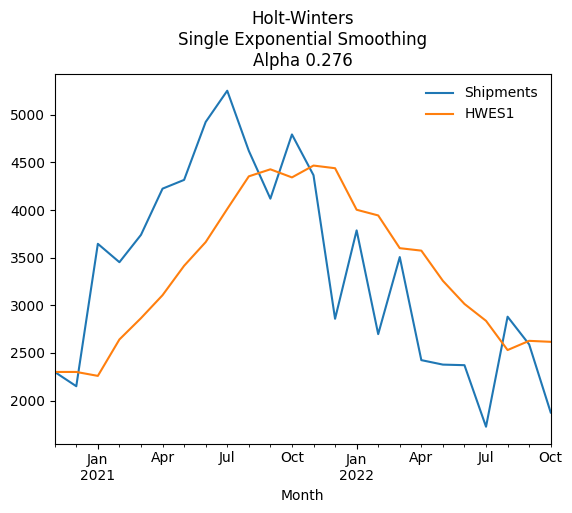

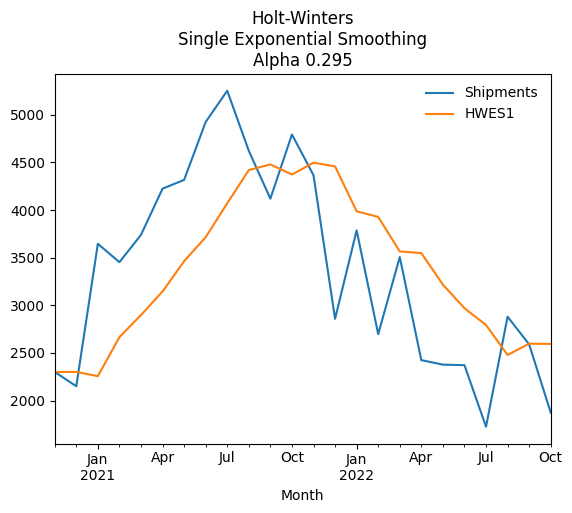

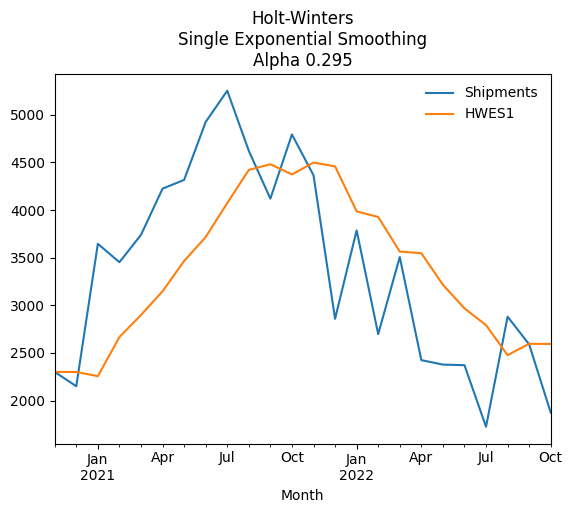

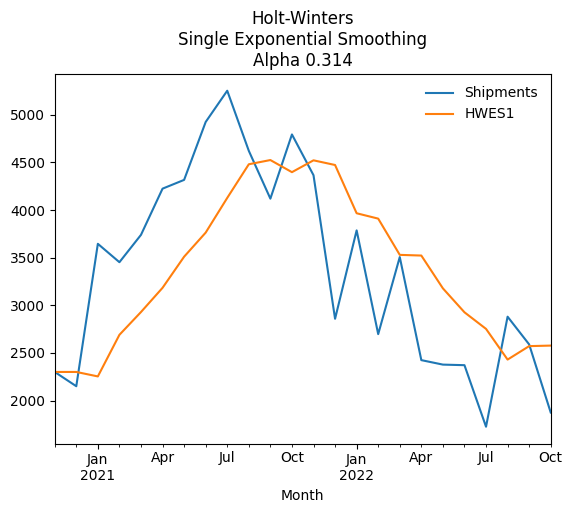

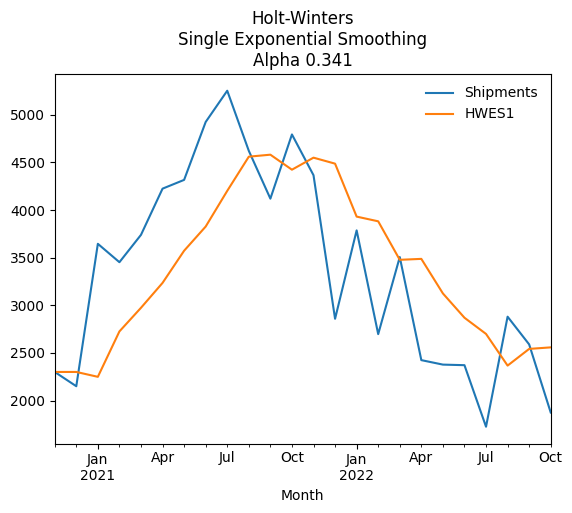

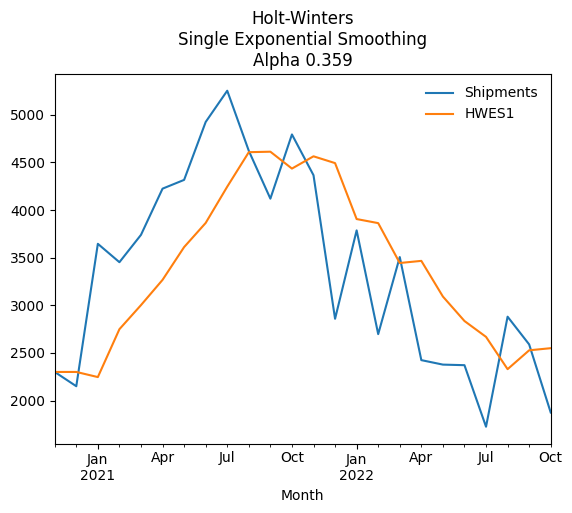

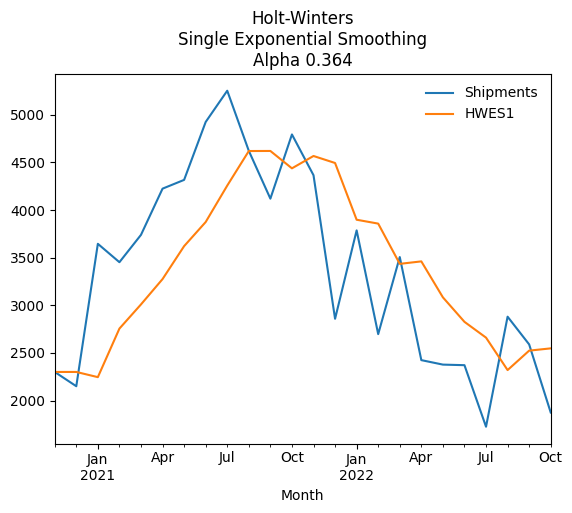

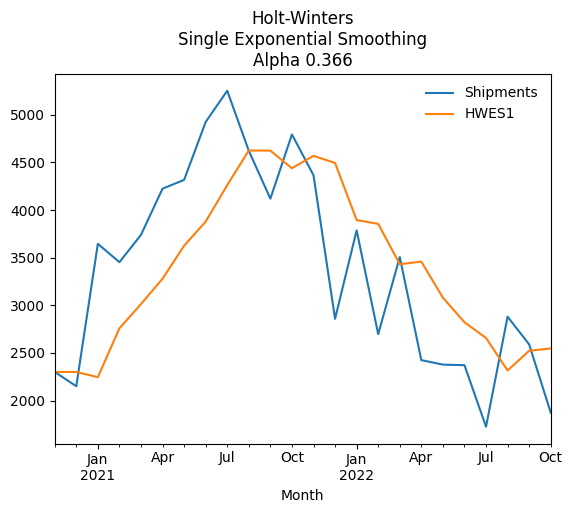

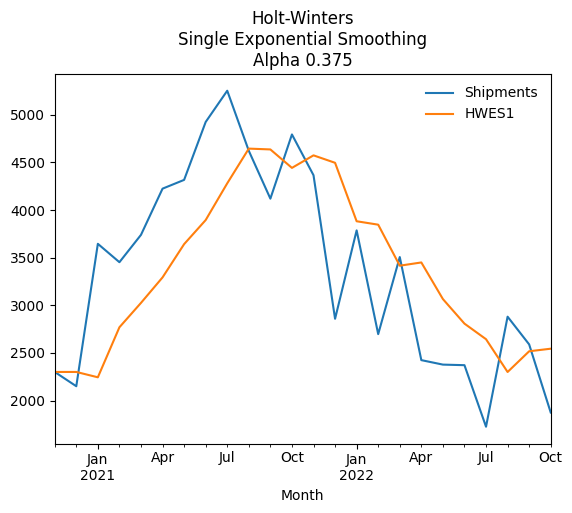

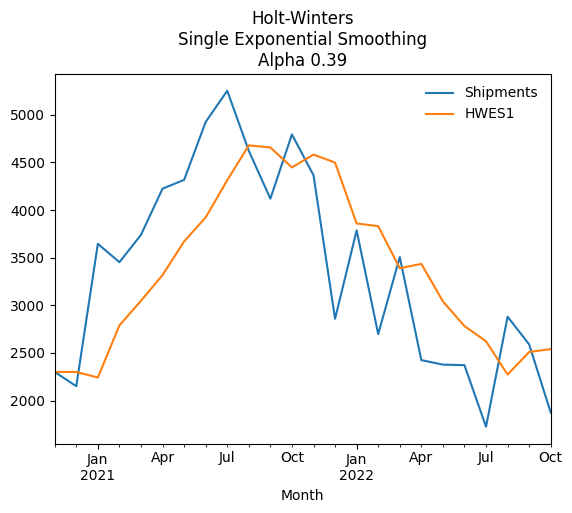

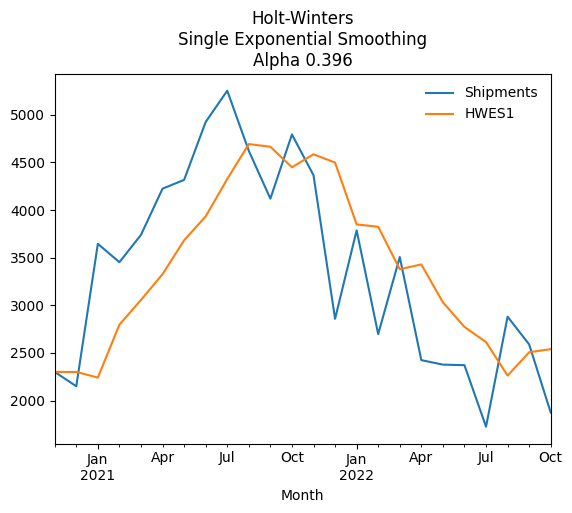

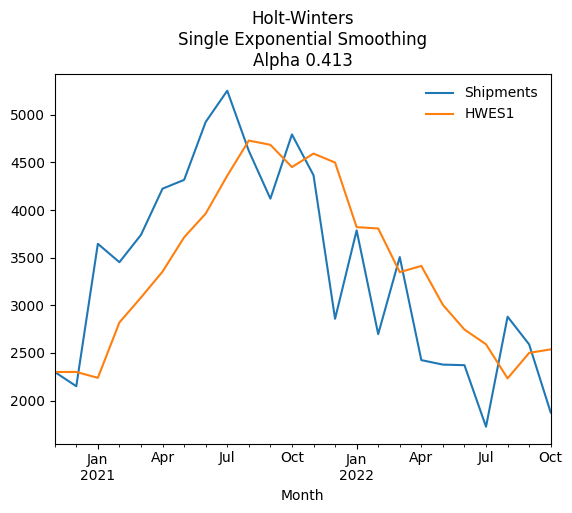

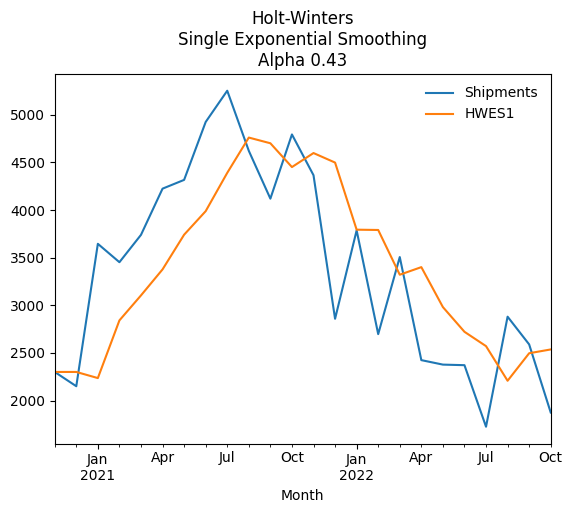

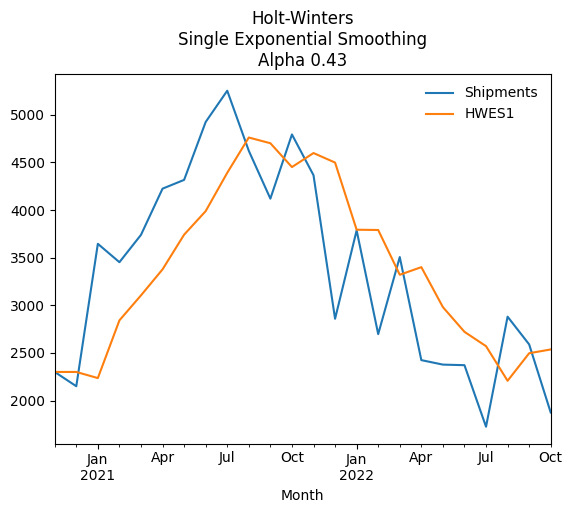

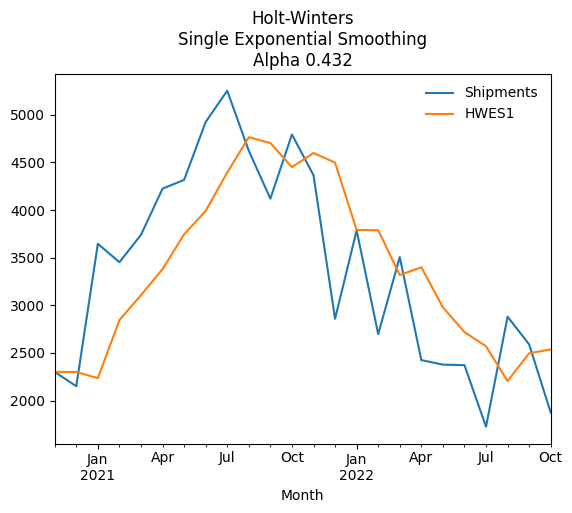

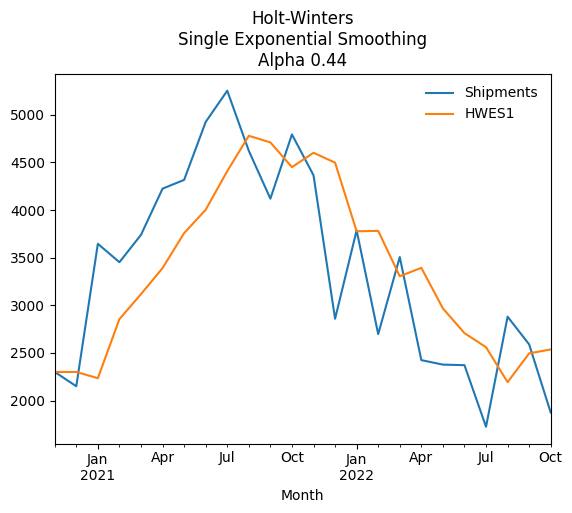

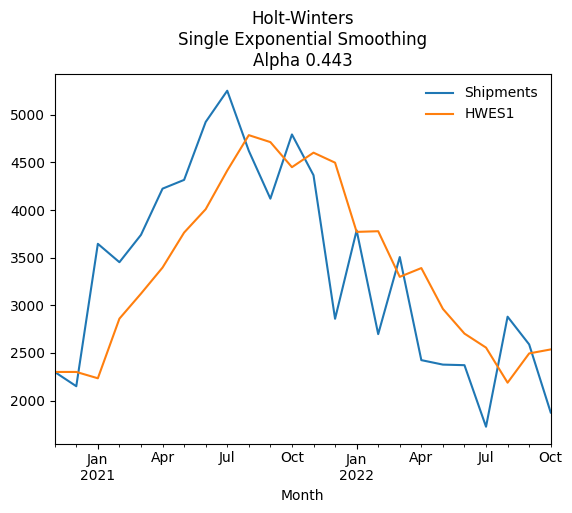

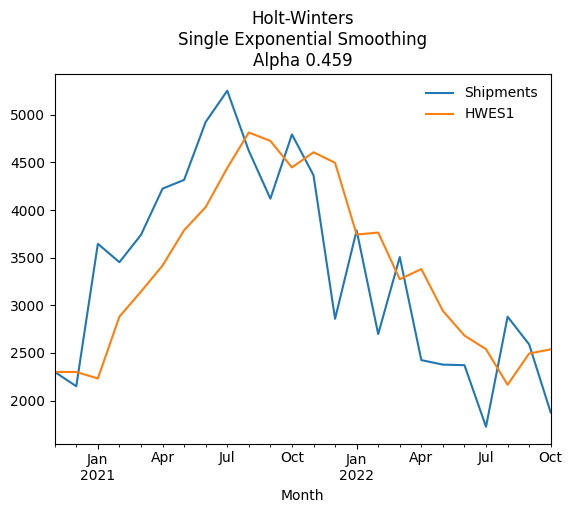

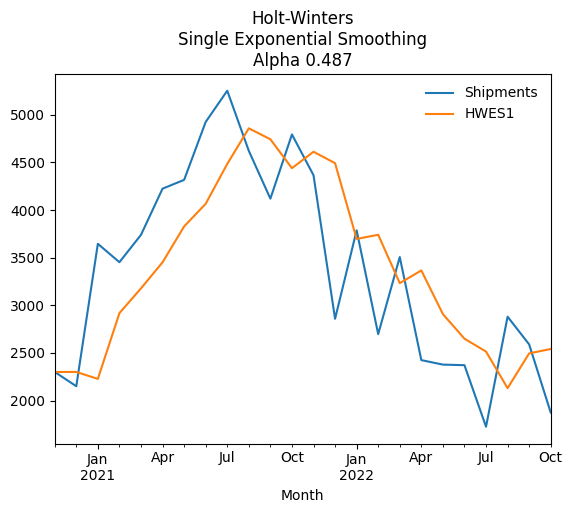

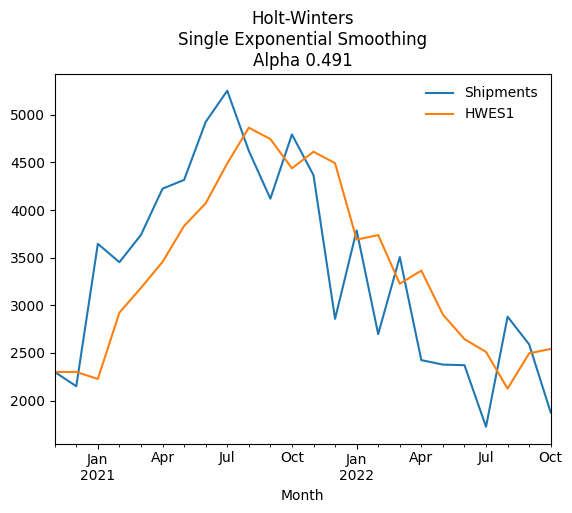

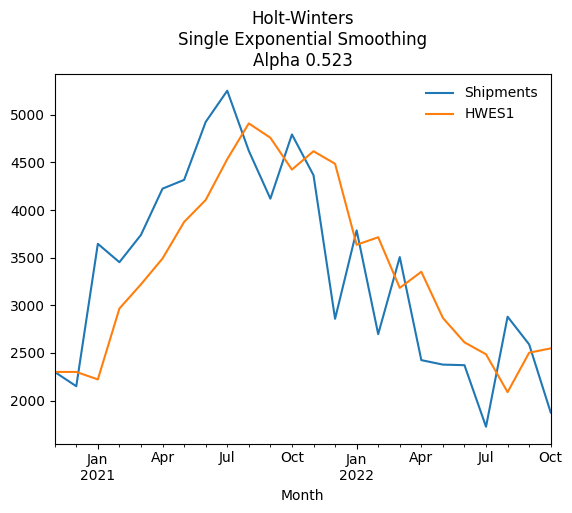

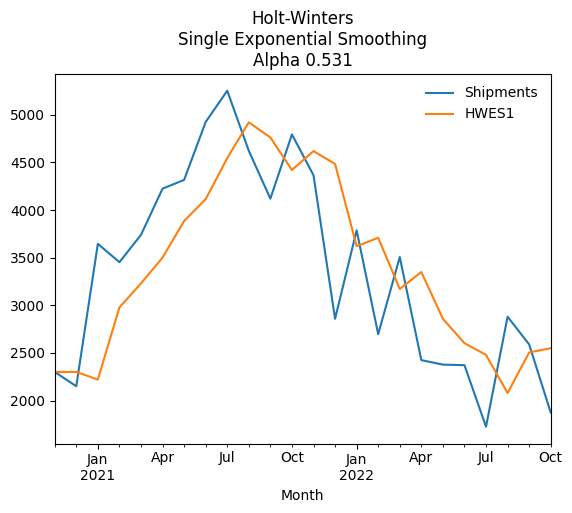

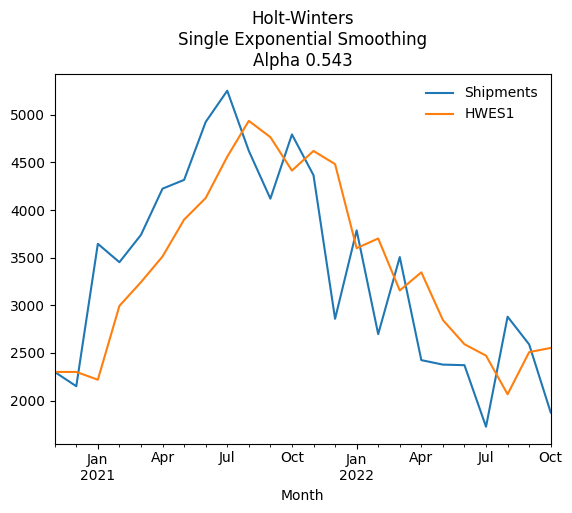

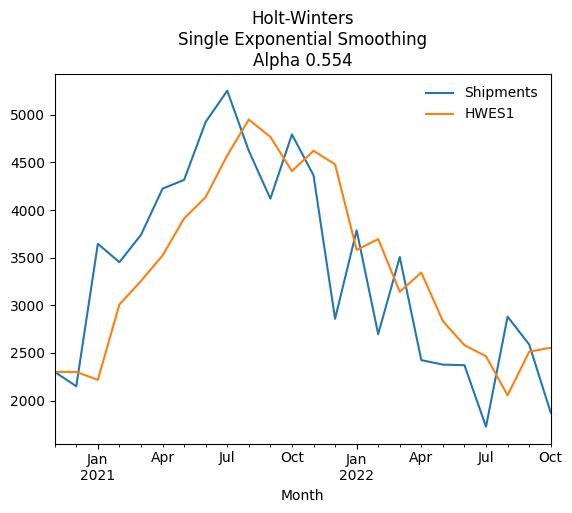

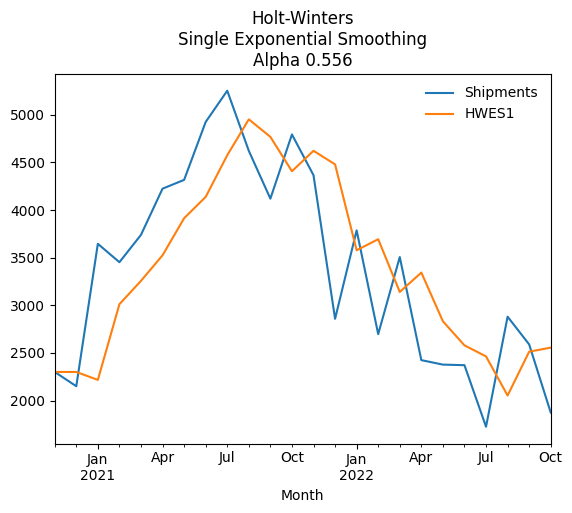

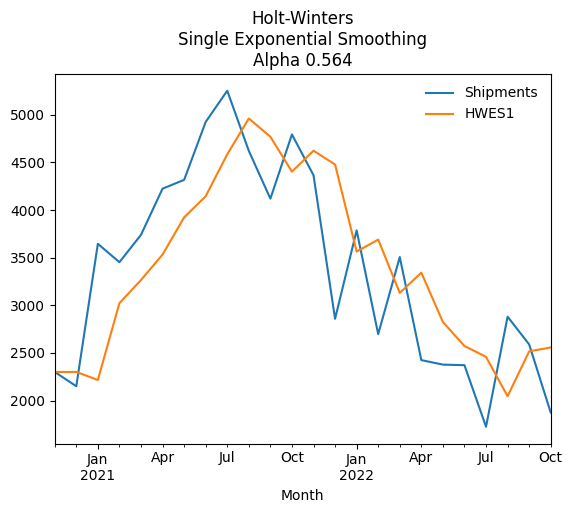

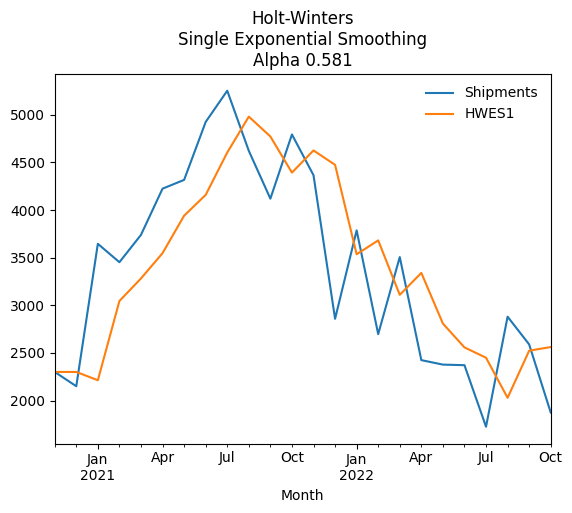

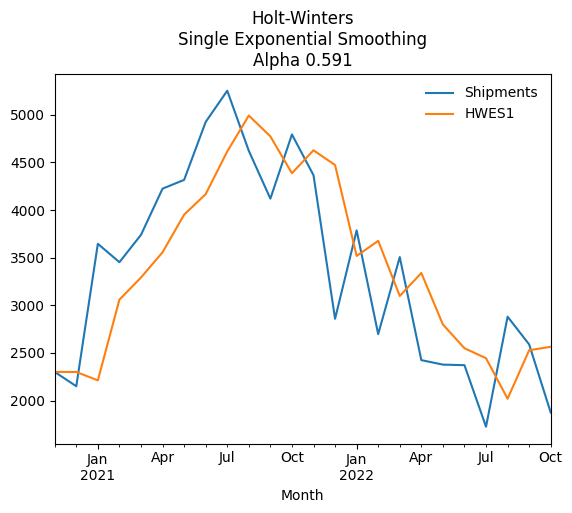

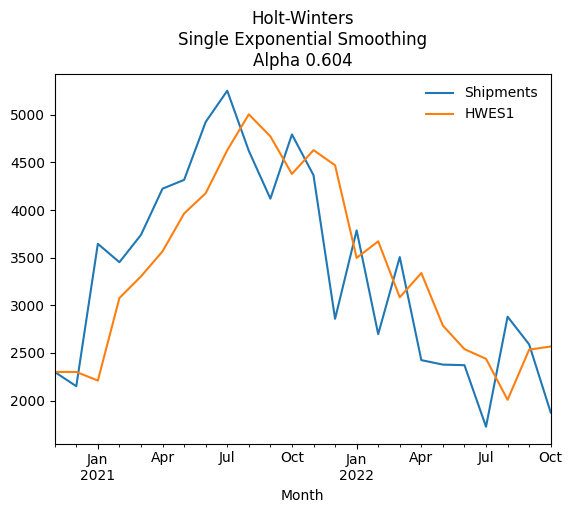

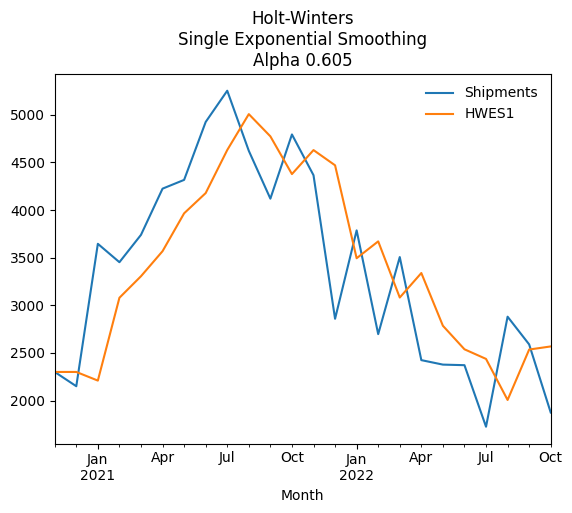

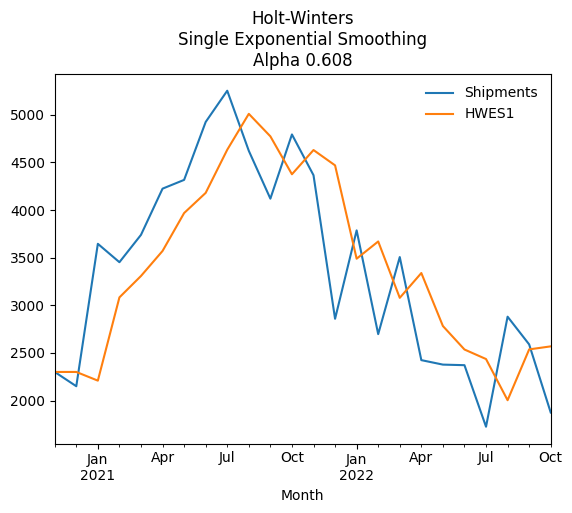

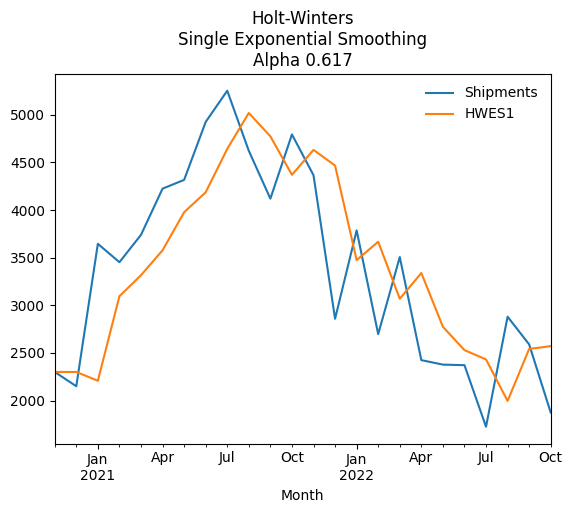

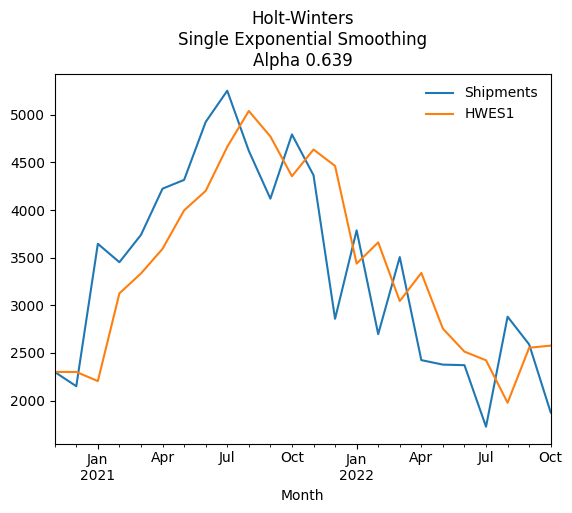

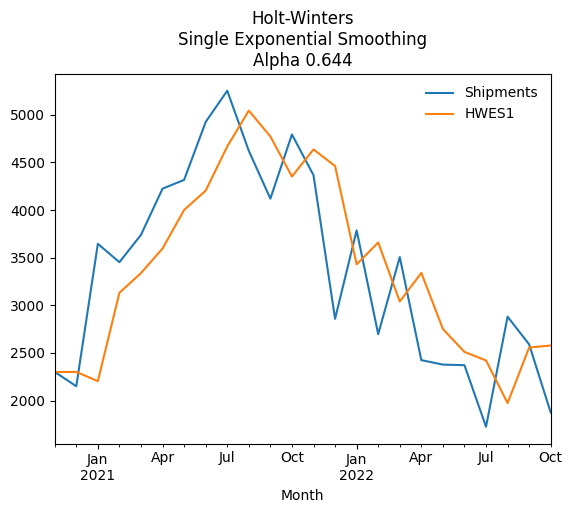

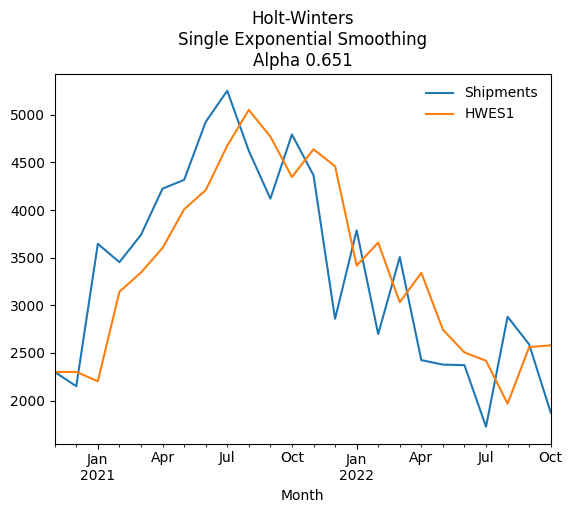

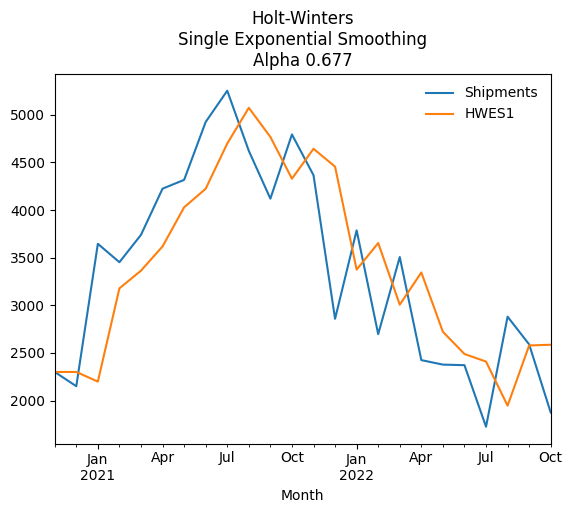

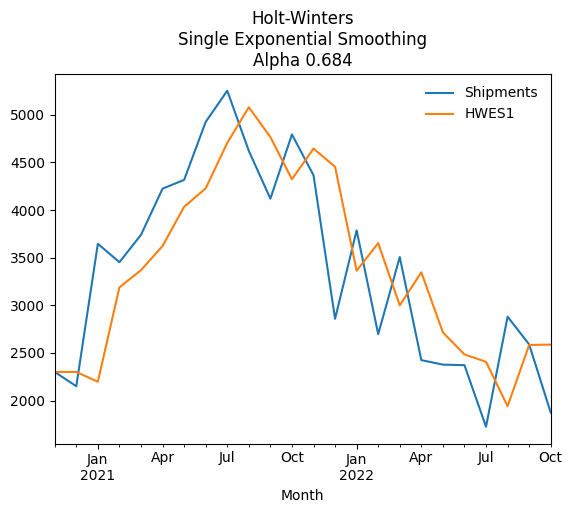

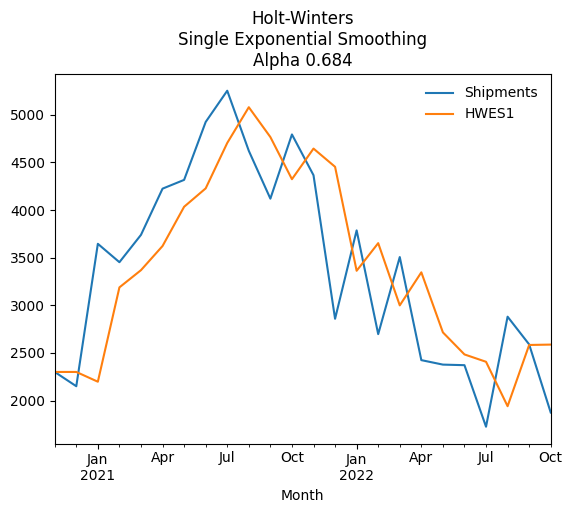

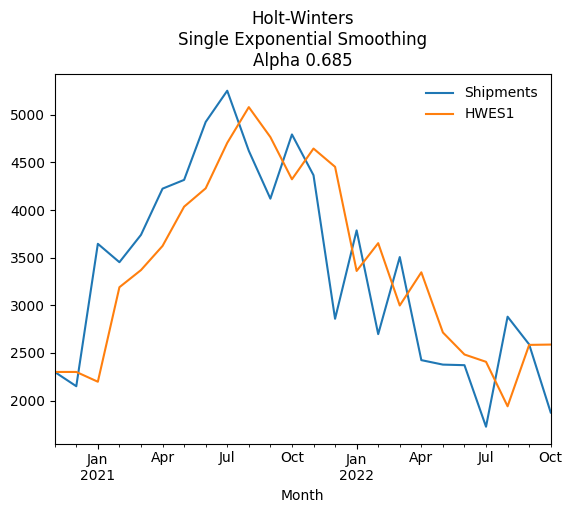

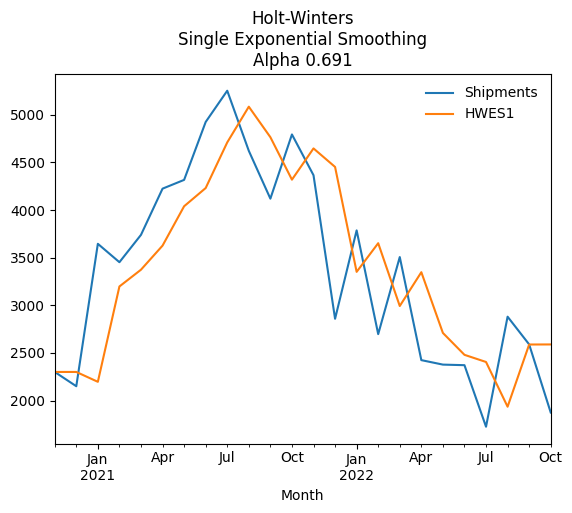

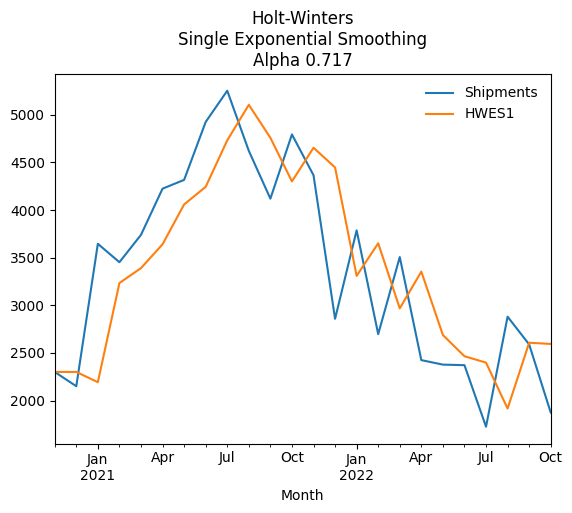

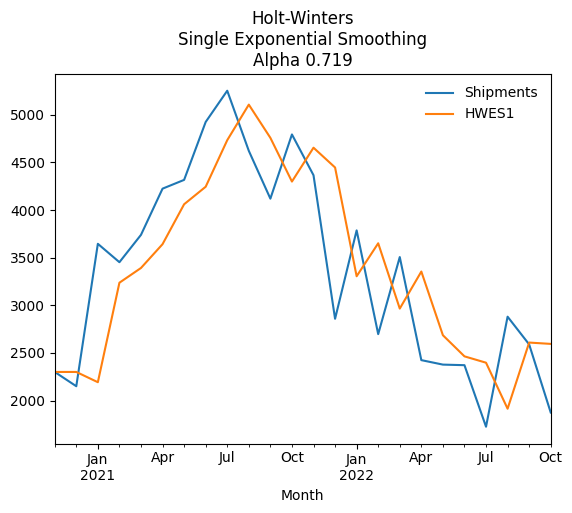

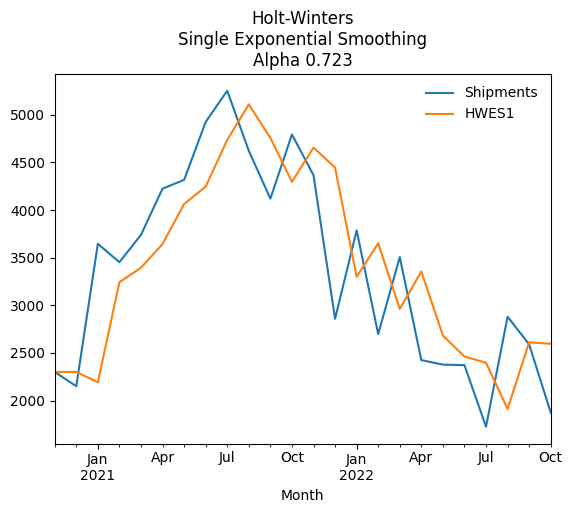

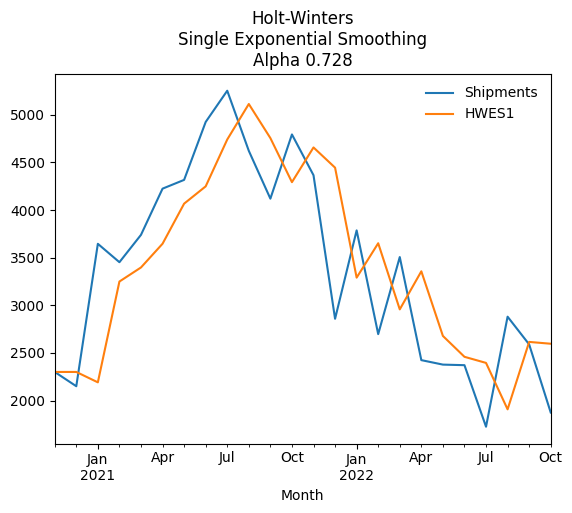

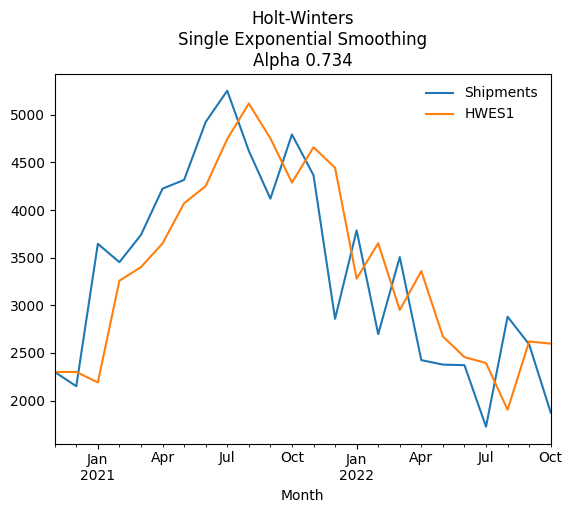

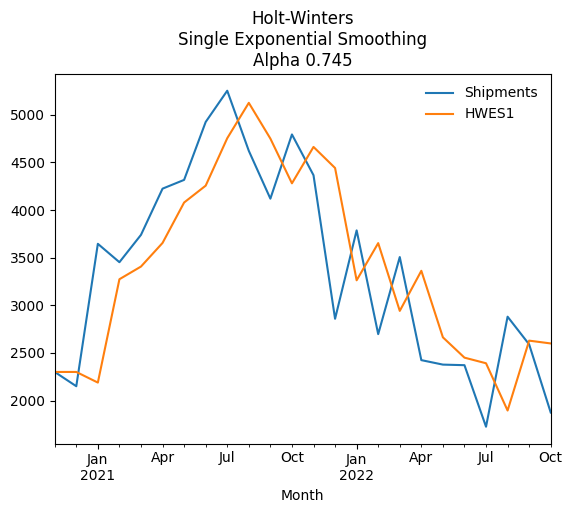

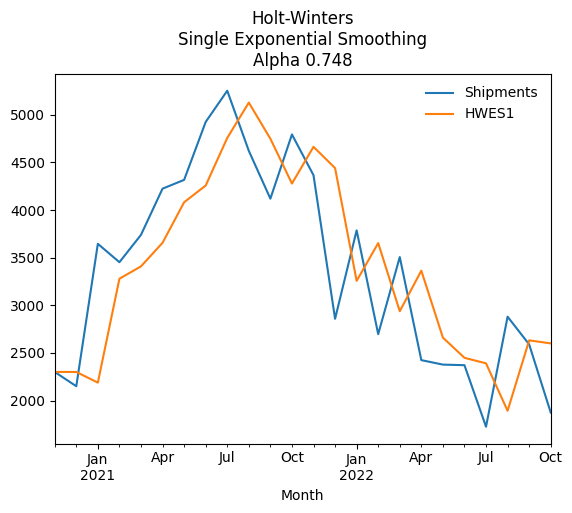

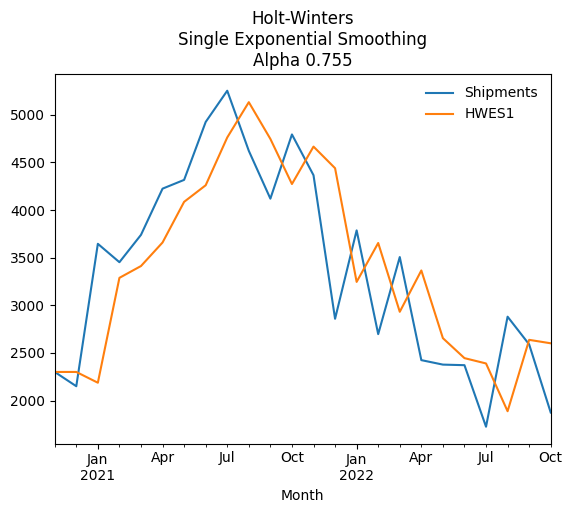

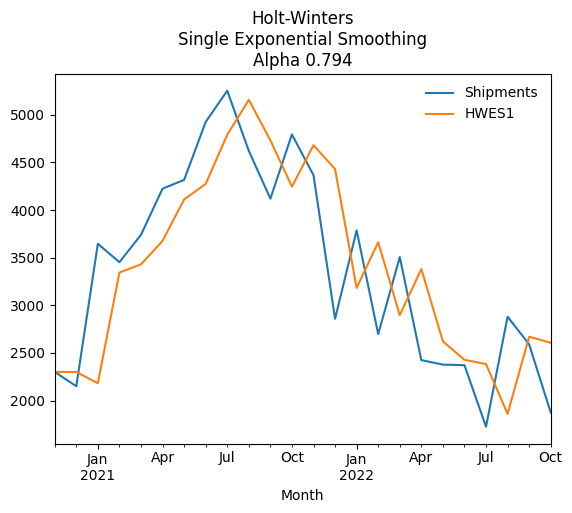

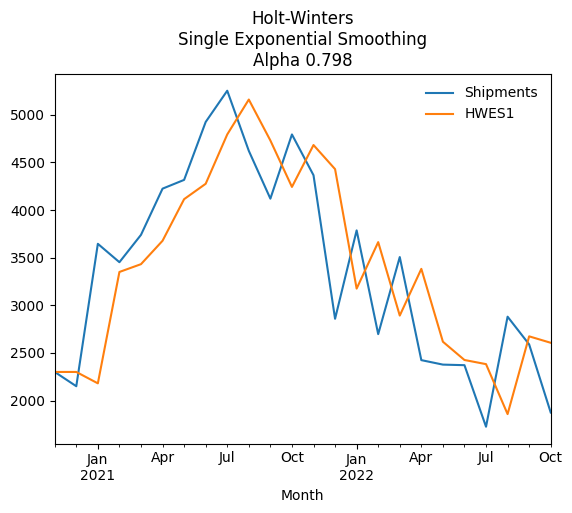

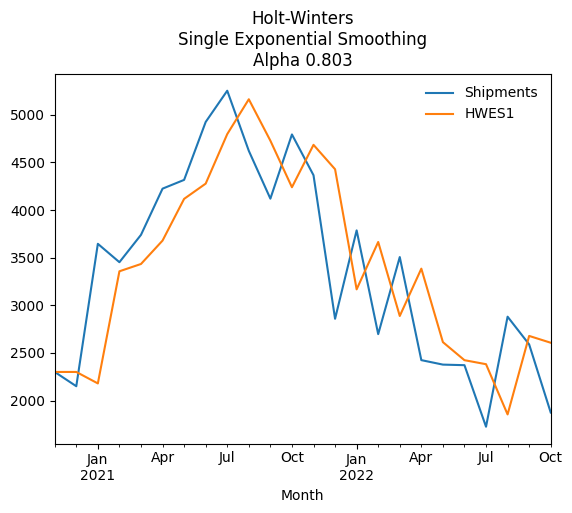

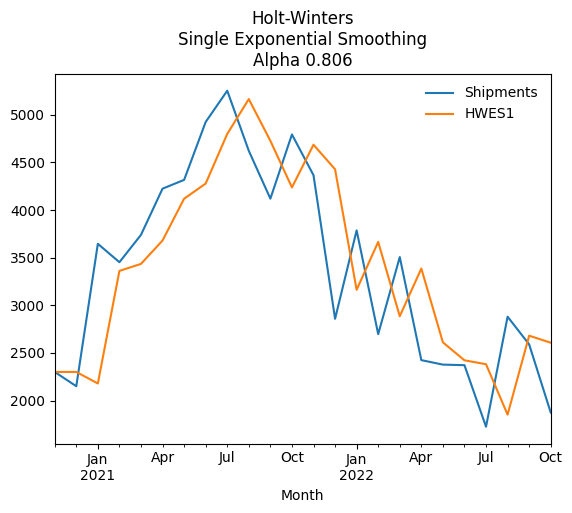

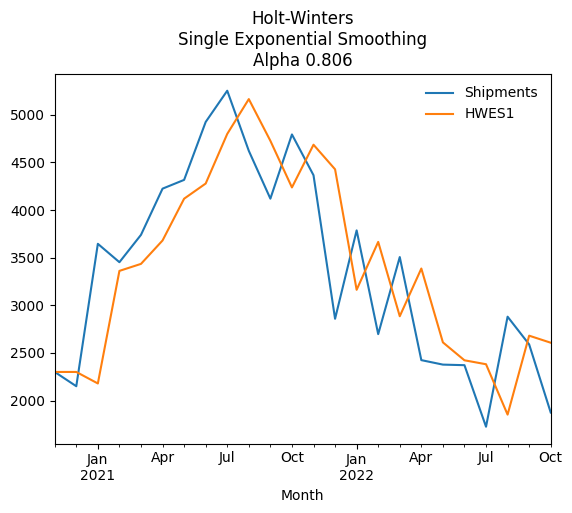

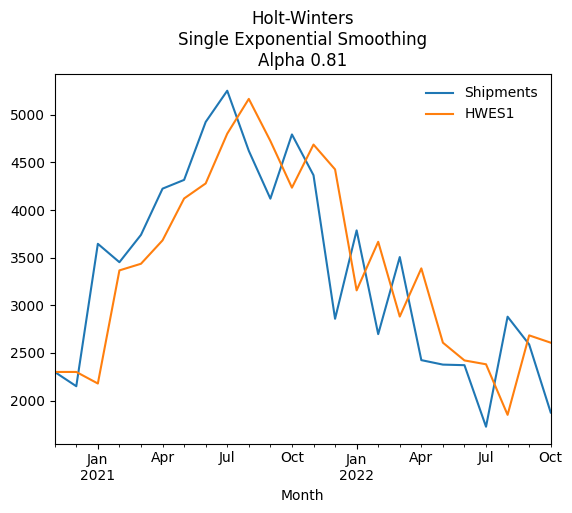

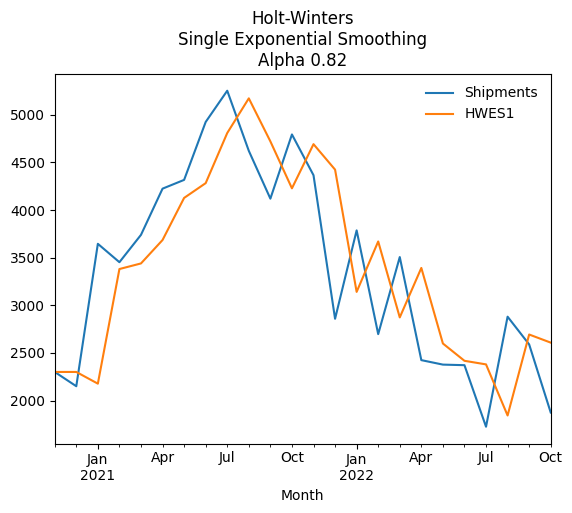

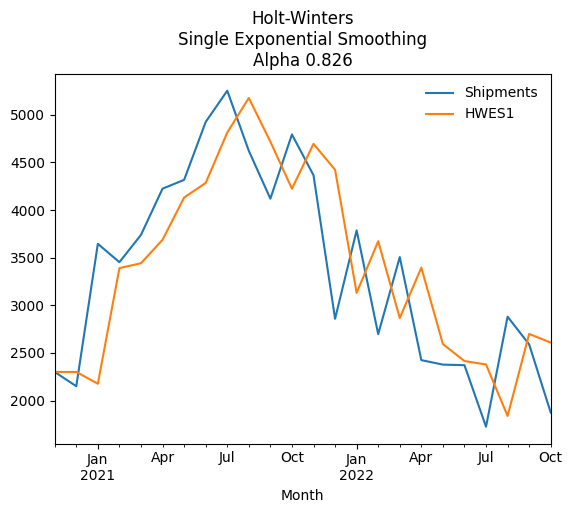

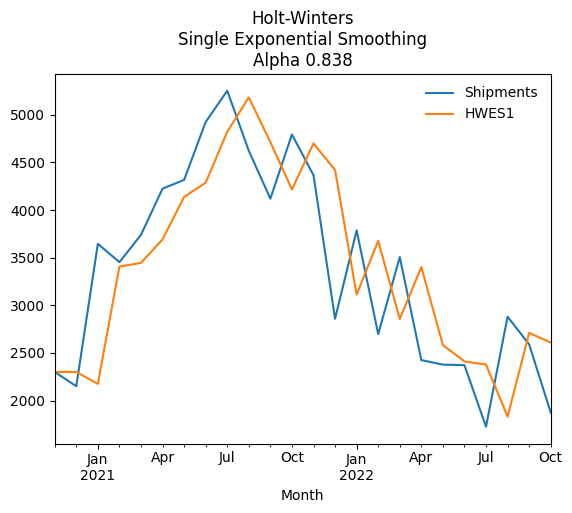

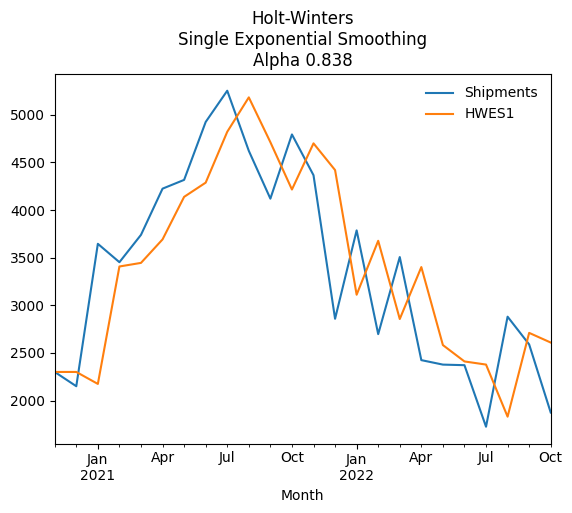

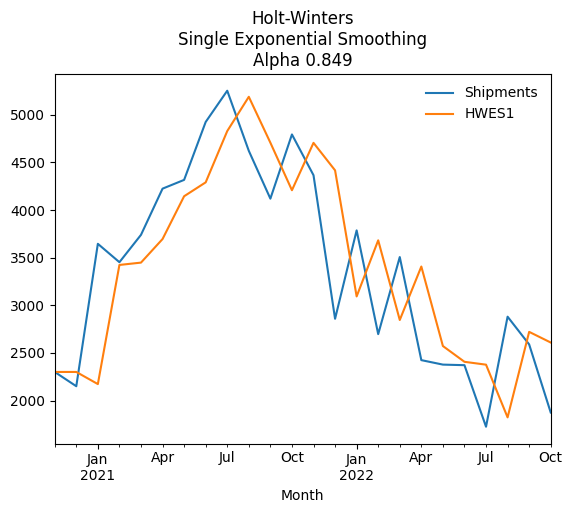

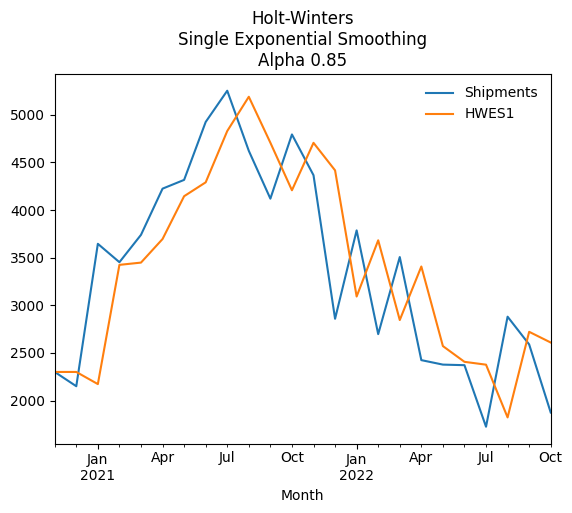

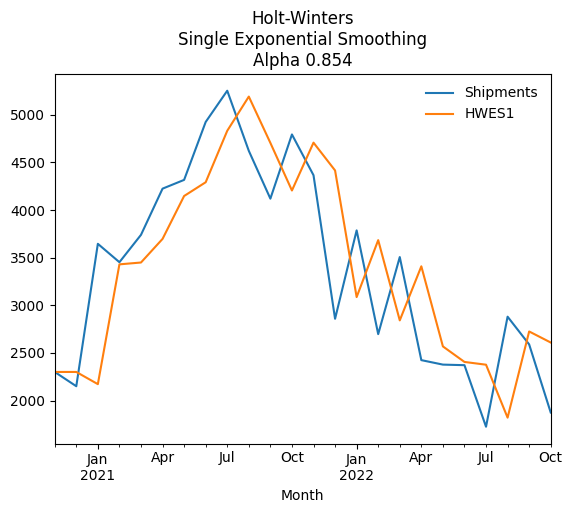

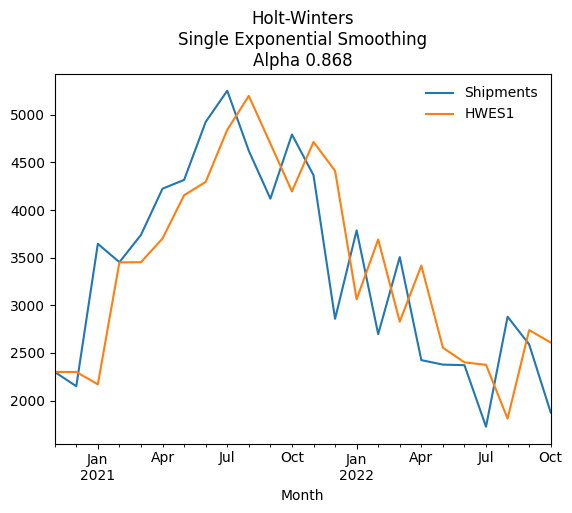

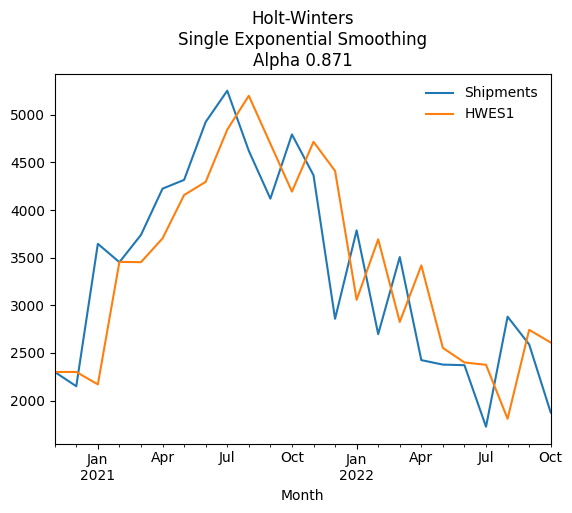

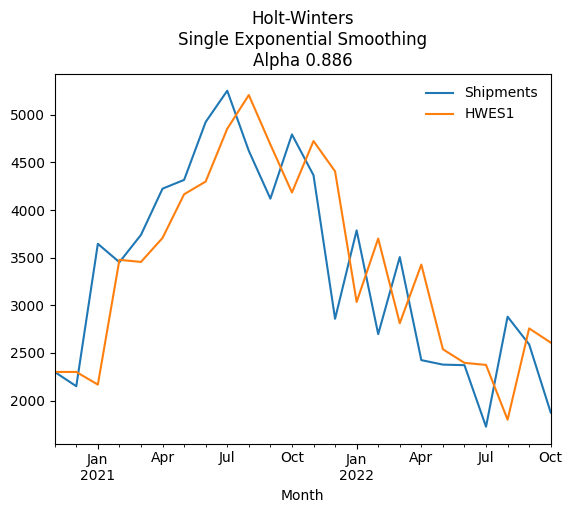

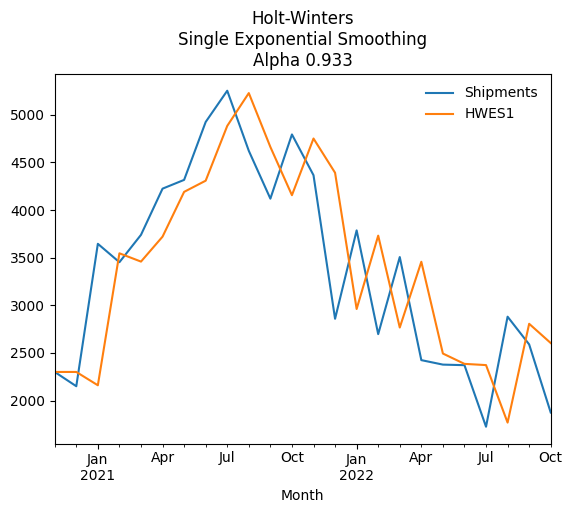

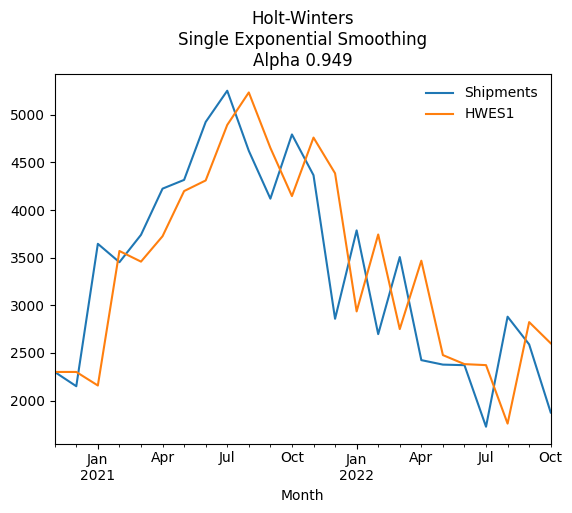

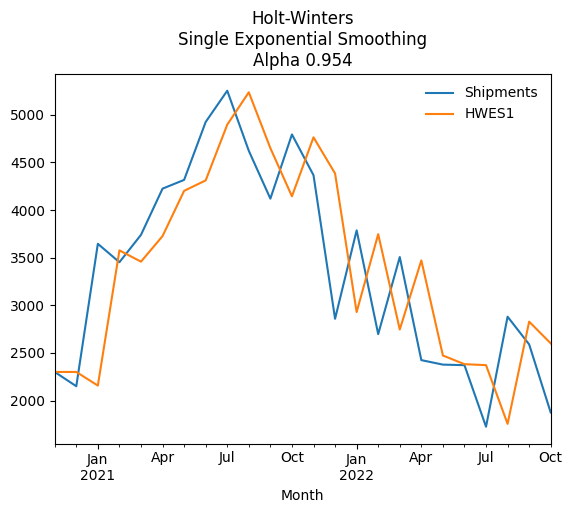

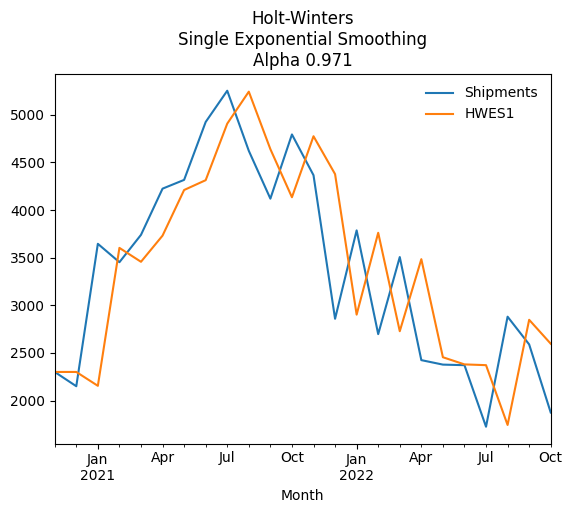

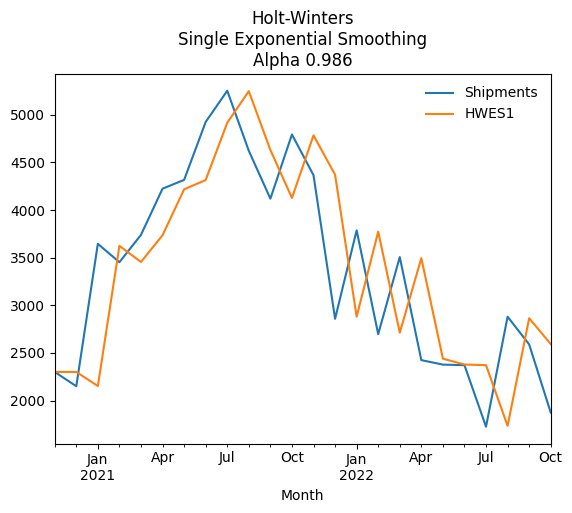

In [ ]:
alphas=[0.4,0.7,0.3]

import random    ## Numeros aleatorios
random.seed(13)  ## Semilla de inicializacón
alphas=[random.random()  for i in range(100)]

alphas.sort()

metrica_full = []

for alpha in alphas:
  name= 'Graficas_class'+ str(today)+'_alpha_' +str(alpha)+ '.png'

  airline["HWES1"] = SimpleExpSmoothing(airline["Shipments"]).\
  fit(smoothing_level=alpha,optimized=False,use_brute=True).fittedvalues
  actual= airline['Shipments']
  forecast= airline['HWES1']

  metrica= errores(actual, forecast)
  metrica['alpha']=alpha

  metrica_full.append(metrica)

  print('alpha: '+ str(round(alpha,3)))

  airline[["Shipments","HWES1"]].\
  plot(title="Holt-Winters" +"\n"+  "Single Exponential Smoothing"+ "\n"+"Alpha " +str(round(alpha,3)) );
  plt.legend(framealpha=1, frameon=False);
  plt.savefig(path_imagenes+'/'+ name,dpi=300)


In [30]:
metrica_full = pd.concat(metrica_full, axis=0)

mask = (metrica_full['metrica']=='mean_absolute_percentage_error') #&  (metrica_full['valor']==metrica_full['valor'].min())
a= metrica_full[mask] #definio el subconjunto de A para poder sacar el mape
mask= (a['valor']==a['valor'].min())
a[mask]

metrica     valor     alpha
3  mean_absolute_percentage_error  0.181112  0.734024

In [38]:
print(a)

                           metrica     valor     alpha
3   mean_absolute_percentage_error  0.283988  0.014432
3   mean_absolute_percentage_error  0.295947  0.038827
3   mean_absolute_percentage_error  0.298965  0.043209
3   mean_absolute_percentage_error  0.306575  0.069144
3   mean_absolute_percentage_error  0.306503  0.073276
..                             ...       ...       ...
3   mean_absolute_percentage_error  0.186274  0.932978
3   mean_absolute_percentage_error  0.187312  0.949323
3   mean_absolute_percentage_error  0.187593  0.953666
3   mean_absolute_percentage_error  0.188752  0.971303
3   mean_absolute_percentage_error  0.189719  0.985681

[100 rows x 3 columns]


# Descarga del

In [31]:
### r2 score es el coeficiente de correlacion
metrica_full.to_csv('salida.csv',index=False,encoding='utf-8')
metrica_full.to_csv(path_imagenes+'/' + 'salida_'+ str(today) + '.csv',index=False,encoding='utf-8')
files.download('salida.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

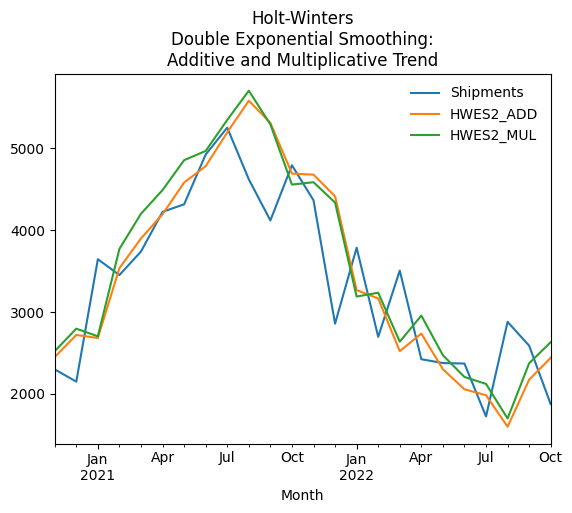

In [32]:
airline["HWES2_ADD"] = ExponentialSmoothing(airline["Shipments"],trend="add").fit().fittedvalues
airline["HWES2_MUL"] = ExponentialSmoothing(airline["Shipments"],trend="mul").fit().fittedvalues

airline[["Shipments","HWES2_ADD","HWES2_MUL"]].\
plot(title="Holt-Winters" +"\n"+ "Double Exponential Smoothing:"+"\n"+ "Additive and Multiplicative Trend")
plt.legend(framealpha=1, frameon=False);

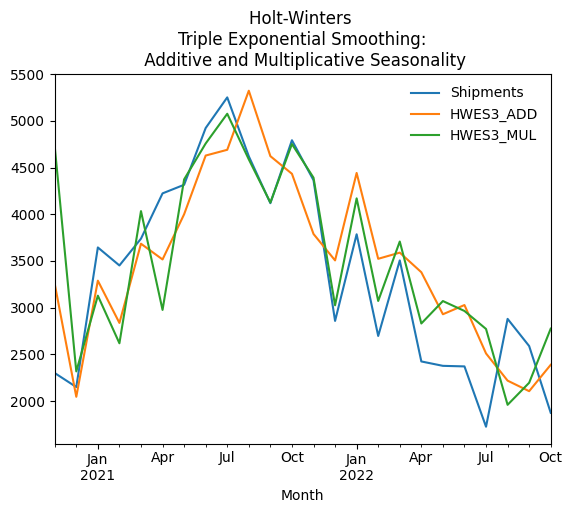

In [33]:
#### Triple HWES
airline["HWES3_ADD"] = ExponentialSmoothing(airline["Shipments"],trend="add",seasonal="add",seasonal_periods=12).fit().fittedvalues
airline["HWES3_MUL"] = ExponentialSmoothing(airline["Shipments"],trend="mul",seasonal="mul",seasonal_periods=12).fit().fittedvalues
airline[["Shipments","HWES3_ADD","HWES3_MUL"]].\
plot(title="Holt-Winters " +"\n"+ "Triple Exponential Smoothing:" +"\n"+ " Additive and Multiplicative Seasonality");
plt.legend(framealpha=1, frameon=False);

In [34]:
airline.query('HWES1>112.00')

Shipments        HWES1    HWES2_ADD    HWES2_MUL    HWES3_ADD  \
Month                                                                       
2020-11-01       2300  2300.000000  2450.182251  2522.329123  3254.864022   
2020-12-01       2150  2300.000000  2719.974178  2797.002497  2045.438494   
2021-01-01       3645  2152.147822  2683.064931  2703.381983  3289.108922   
2021-02-01       3452  3623.624127  3536.408395  3771.281499  2836.511729   
2021-03-01       3739  3454.457454  3898.950835  4200.198264  3684.788113   
2021-04-01       4224  3734.925688  4194.550074  4489.762820  3516.357067   
2021-05-01       4316  4216.997036  4581.892347  4854.870544  4000.128148   
2021-06-01       4924  4314.582395  4781.126465  4967.763326  4629.103800   
2021-07-01       5252  4915.273862  5194.604139  5346.462441  4690.804277   
2021-08-01       4621  5247.178481  5581.153909  5703.127984  5323.388944   
2021-09-01       4119  4629.966133  5310.585146  5291.976722  4622.545042   
2021-10-01       4793  4126.316429  4691.253871  4556.603313  4433.632112   
2021-11-01       4365  4783.453882  4678.046719  4585.601298  3789.207404   
2021-12-01       2858  4370.991763  4413.018020  4337.110258  3506.103309   
2022-01-01       3786  2879.664248  3267.485655  3189.215503  4442.836558   
2022-02-01       2697  3773.022347  3166.503229  3236.384086  3523.374106   
2022-03-01       3506  2712.407364  2522.249402  2638.286473  3589.541629   
2022-04-01       2424  3494.636694  2737.121084  2956.703560  3379.428999   
2022-05-01       2377  2439.330248  2300.978030  2472.633001  2929.550480   
2022-06-01       2371  2377.892495  2056.507540  2207.037838  3028.073981   
2022-07-01       1725  2371.098692  1984.361356  2122.131499  2509.823863   
2022-08-01       2880  1734.251367  1599.406281  1699.890867  2218.532340   
2022-09-01       2589  2863.594238  2173.604536  2374.888217  2105.783047   
2022-10-01       1874  2592.931864  2441.334716  2632.024816  2388.268641   

              HWES3_MUL  
Month                    
2020-11-01  4727.250005  
2020-12-01  2317.441002  
2021-01-01  3128.380791  
2021-02-01  2618.696721  
2021-03-01  4034.217446  
2021-04-01  2975.810522  
2021-05-01  4373.358291  
2021-06-01  4758.416521  
2021-07-01  5076.695631  
2021-08-01  4587.765699  
2021-09-01  4125.940273  
2021-10-01  4752.175795  
2021-11-01  4392.193627  
2021-12-01  3025.238960  
2022-01-01  4170.677446  
2022-02-01  3071.956723  
2022-03-01  3708.182041  
2022-04-01  2830.598143  
2022-05-01  3070.798781  
2022-06-01  2964.644233  
2022-07-01  2772.065521  
2022-08-01  1959.501594  
2022-09-01  2195.864549  
2022-10-01  2775.365573